In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import itertools as it

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd

class data_object(object):
    def __init__(self, name):
        self.name = name

In [2]:
plt.style.use('seaborn-poster')

In [3]:
with open('random_states_3.pickle','rb') as f:
    random_states = pickle.load(f)
random_states = {i:random_states[i] for i in random_states}

# First, let's take a look at solution statistics

In [4]:
total_runs = []
finished_initialization = []
finished_DDF_product = []
finished_revenue = []
finished_DDF_reflux = []
finished_profit_3 = []
finished_profit_3_1 = []
finished_profit_3_2 = []

with open('./log/master/master_log.txt','r') as f:
    for key, group in it.groupby(f,lambda line: line.startswith('------------')):
        if not key:
            run_data = list(group)

            # get run number
            start = 'Preset_Case_'
            end = '_'
            s = run_data[2]
            run_case = int(s[s.find(start)+len(start):s.rfind(end)])
            total_runs.append(run_case)
            
            # get status
            if 'Success: > Initialization\n' in run_data:
                finished_initialization.append(True)
            else:
                finished_initialization.append(False)
                
            if 'Success: > Added DDF formulation - Product\n' in run_data:
                finished_DDF_product.append(True)
            else:
                finished_DDF_product.append(False)
                
            if 'Success: > One-step Optimization - Revenue\n' in run_data:
                finished_revenue.append(True)
            else:
                finished_revenue.append(False)
                
            if 'Success: > Added DDF formulation - Reflux\n' in run_data:
                finished_DDF_reflux.append(True)
            else:
                finished_DDF_reflux.append(False)
                
            if 'Success: > One-step Optimization - Profit 3\n' in run_data:
                finished_profit_3.append(True)
            else:
                finished_profit_3.append(False)
            
            if 'Success: > One-step Optimization - Profit 3-1\n' in run_data:
                finished_profit_3_1.append(True)
            else:
                finished_profit_3_1.append(False)
                
            if 'Success: > One-step Optimization - Profit 3-2\n' in run_data:
                finished_profit_3_2.append(True)
            else:
                finished_profit_3_2.append(False)
                
finished_initialization = np.array(finished_initialization)
finished_DDF_product = np.array(finished_DDF_product)
finished_revenue = np.array(finished_revenue)
finished_DDF_reflux = np.array(finished_DDF_reflux)
finished_profit_3 = np.array(finished_profit_3)
finished_profit_3_1 = np.array(finished_profit_3_1)
finished_profit_3_2 = np.array(finished_profit_3_2)

finished_optimization_any = np.any([finished_revenue,finished_profit_3,finished_profit_3_1,finished_profit_3_2],axis=0)
finished_optimization_all = np.all([finished_revenue,finished_profit_3,finished_profit_3_1,finished_profit_3_2],axis=0)

In [5]:
initialization_failure_case = [total_runs[j_] for j_, j in enumerate(finished_initialization) if not j]
DDF_product_failure_case = [total_runs[j_] for j_, j in enumerate(finished_DDF_product) if not j]
revenue_failure_case = [total_runs[j_] for j_, j in enumerate(finished_revenue) if not j]
DDF_reflux_failure_case = [total_runs[j_] for j_, j in enumerate(finished_DDF_reflux) if not j]
profit_3_failure_case = [total_runs[j_] for j_, j in enumerate(finished_profit_3) if not j]
profit_3_1_failure_case = [total_runs[j_] for j_, j in enumerate(finished_profit_3_1) if not j]
profit_3_2_failure_case = [total_runs[j_] for j_, j in enumerate(finished_profit_3_2) if not j]

## Total number of attempts

In [6]:
len(total_runs)

995

In [7]:
'invalid cases: ', set(i for i in random_states) - set(total_runs)

('invalid cases: ', {591, 809, 893, 967, 996})

## Successfully initialized

In [8]:
sum(finished_initialization), sum(finished_initialization) / len(total_runs)

(899, 0.9035175879396985)

## Successfully adopted product DDF formulation

In [9]:
sum(finished_DDF_product), sum(finished_DDF_product) / sum(finished_initialization)

(880, 0.978865406006674)

## Successfully reached revenue optimum solution

In [10]:
sum(finished_revenue), sum(finished_revenue) / sum(finished_DDF_product)

(564, 0.6409090909090909)

## Successfully adopted reflux DDF formulation

In [11]:
sum(finished_DDF_reflux), sum(finished_DDF_reflux) / sum(finished_revenue)

(564, 1.0)

## Successfully reached profit optimum solution: profit-3

In [12]:
sum(finished_profit_3), sum(finished_profit_3) / sum(finished_DDF_reflux)

(562, 0.9964539007092199)

### Increasing tray cost weight : profit-3-1

In [13]:
sum(finished_profit_3_1), sum(finished_profit_3_1) / sum(finished_DDF_reflux)

(550, 0.975177304964539)

### Increasing feed cost weight: profit-3-2

In [14]:
sum(finished_profit_3_2), sum(finished_profit_3_2) / sum(finished_DDF_reflux)

(552, 0.9787234042553191)

# Different starting points doesn't seem to drastically affect success rate

In [15]:
def divide_data(x):
    x = np.array(x)
    return x, x[finished_initialization], x[finished_optimization_any]

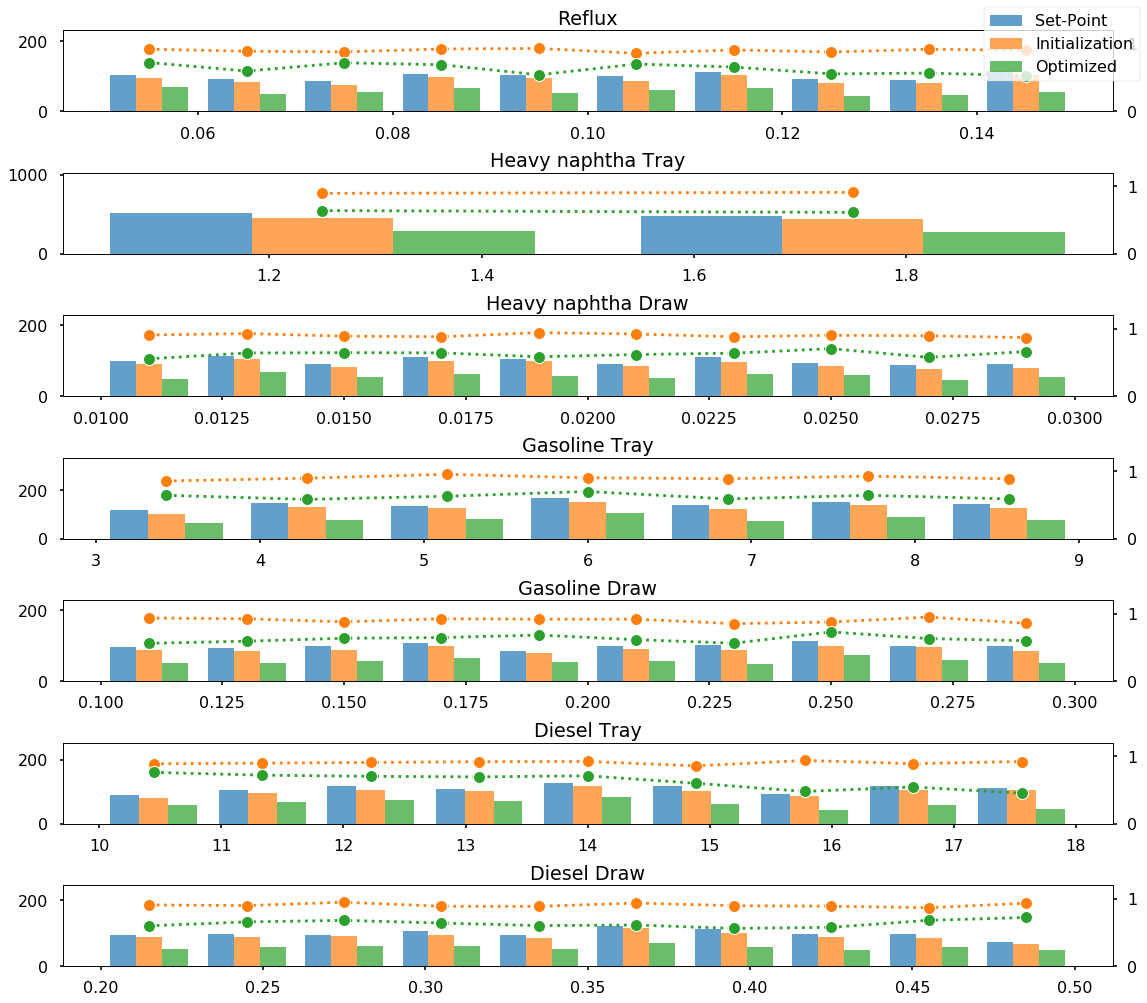

In [16]:
reflux_ratio_all = np.array([random_states[i].rr_ratio for i in random_states if i in total_runs])
intermediate_location_all = np.array([sorted(random_states[i].side_draw_flag.keys())[0] for i in random_states if i in total_runs])
intermediate_draw_all = np.array([list(random_states[i].side_draw_flag.values())[0] for i in random_states if i in total_runs])
gasoline_location_all = np.array([sorted(random_states[i].side_draw_flag.keys())[1] for i in random_states if i in total_runs])
gasoline_draw_all = np.array([list(random_states[i].side_draw_flag.values())[1] for i in random_states if i in total_runs])
diesel_location_all = np.array([sorted(random_states[i].side_draw_flag.keys())[2] for i in random_states if i in total_runs])
diesel_draw_all = np.array([list(random_states[i].side_draw_flag.values())[2] for i in random_states if i in total_runs])

fig, axs = plt.subplots(7,1,figsize=(16,14))

tmp_dic = {0:(reflux_ratio_all,'Reflux',(0.05,0.15),10),
          1:(intermediate_location_all,'Heavy naphtha Tray',(1,2),2),
          2:(intermediate_draw_all,'Heavy naphtha Draw',(0.01,0.03),10),
          3:(gasoline_location_all,'Gasoline Tray',(3,9),7),
          4:(gasoline_draw_all,'Gasoline Draw',(0.1,0.3),10),
          5:(diesel_location_all,'Diesel Tray',(10,18),9),
          6:(diesel_draw_all,'Diesel Draw',(0.2,0.5),10)}

for j in range(7):
    y, bins, patches = axs[j].hist((divide_data(tmp_dic[j][0])),bins=tmp_dic[j][3],histtype='bar',range=tmp_dic[j][2],alpha=0.7)
    ymax = max(y[0])
    axs[j].set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    ax_ = plt.twinx(axs[j])
    ax_.plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    ax_.plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    ax_.set_ylim(0,1.2)

    # ax.grid()
    axs[j].set_title(tmp_dic[j][1])

fig.legend(['Set-Point','Initialization','Optimized'])
plt.tight_layout()
plt.show()
plt.close()

In [17]:
reactive_stages = random_states[1].temperature_flag.keys()

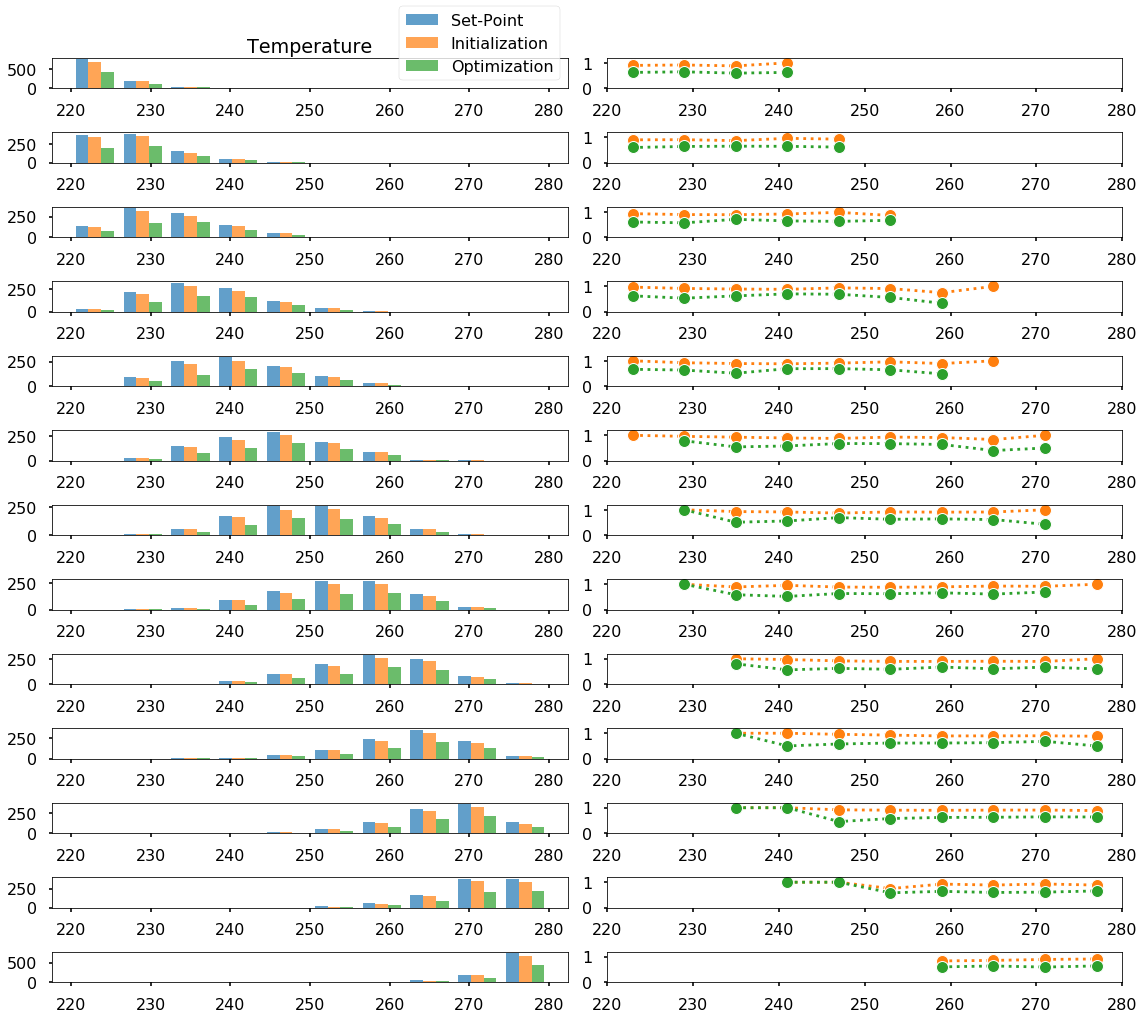

In [18]:
temperature_all = {j:np.array([random_states[i].temperature_flag[j] for i in random_states if i in total_runs])\
                   for j in reactive_stages}

fig, axs = plt.subplots(len(reactive_stages),2,figsize=(16,14))

for j_, j in enumerate(reactive_stages):
    y, bins, patches = axs[j_][0].hist(divide_data(temperature_all[j]),bins=10,histtype='bar',range=(220,280),alpha=0.7)
    ymax = max(y[0])
    # ax.set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    axs[j_][1].plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].set_ylim(0,1.2)
    axs[j_][1].set_xlim(220,280)

axs[0][0].set_title('Temperature')
axs[0][0].legend(['Set-Point','Initialization','Optimization'])

plt.tight_layout()
plt.show()
plt.close()

# Strong 1-sided start seems to increase success rate

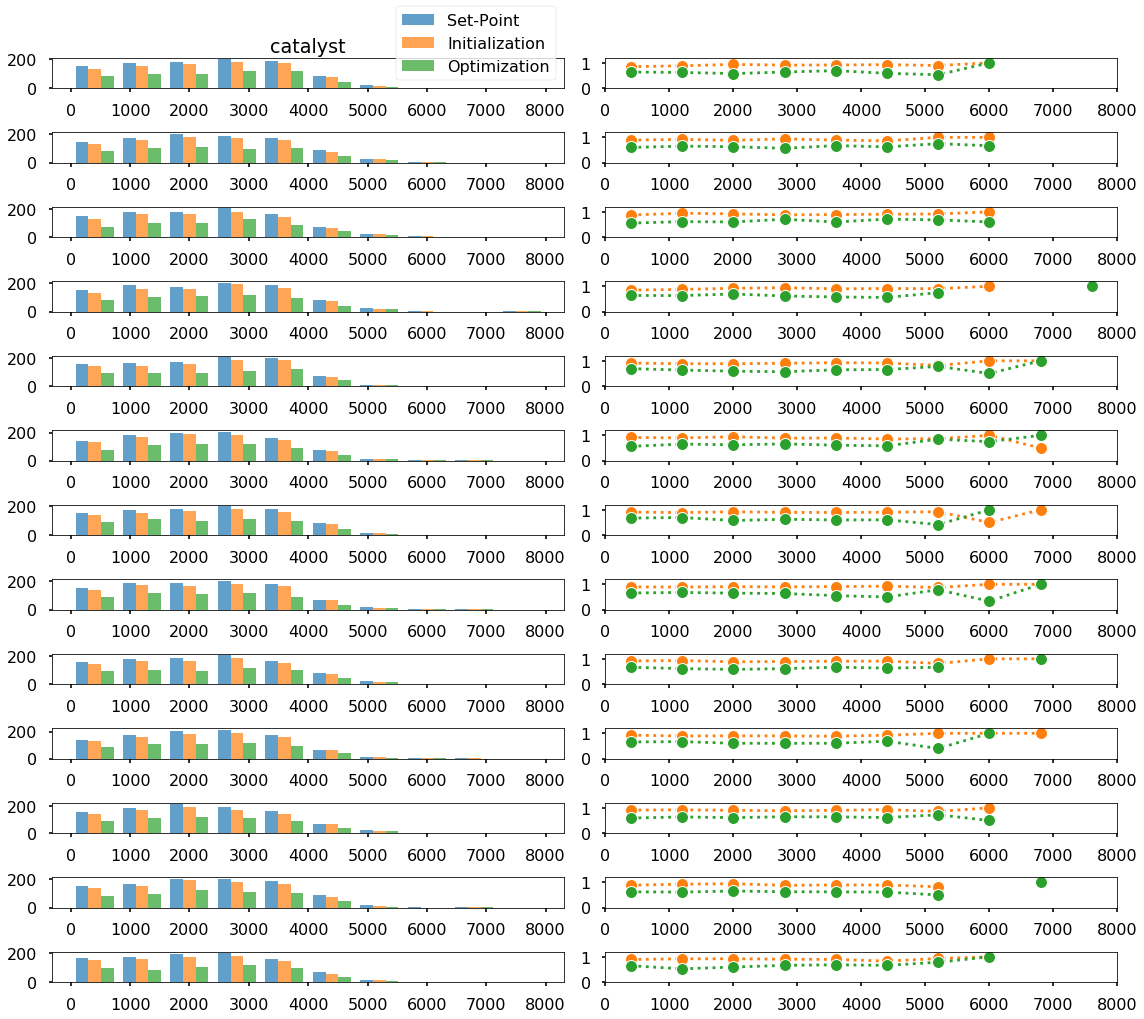

In [19]:
catalyst_all = {j:np.array([random_states[i].catalyst_flag[j] for i in random_states if i in total_runs])\
                   for j in reactive_stages}

fig, axs = plt.subplots(len(reactive_stages),2,figsize=(16,14))

for j_, j in enumerate(reactive_stages):
    y, bins, patches = axs[j_][0].hist(divide_data(catalyst_all[j]),bins=10,histtype='bar',range=(0,8000),alpha=0.7)
    ymax = max(y[0])
    # ax.set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    axs[j_][1].plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].set_ylim(0,1.2)
    axs[j_][1].set_xlim(0,8000)

axs[0][0].set_title('catalyst')
axs[0][0].legend(['Set-Point','Initialization','Optimization'])

plt.tight_layout()
plt.show()
plt.close()

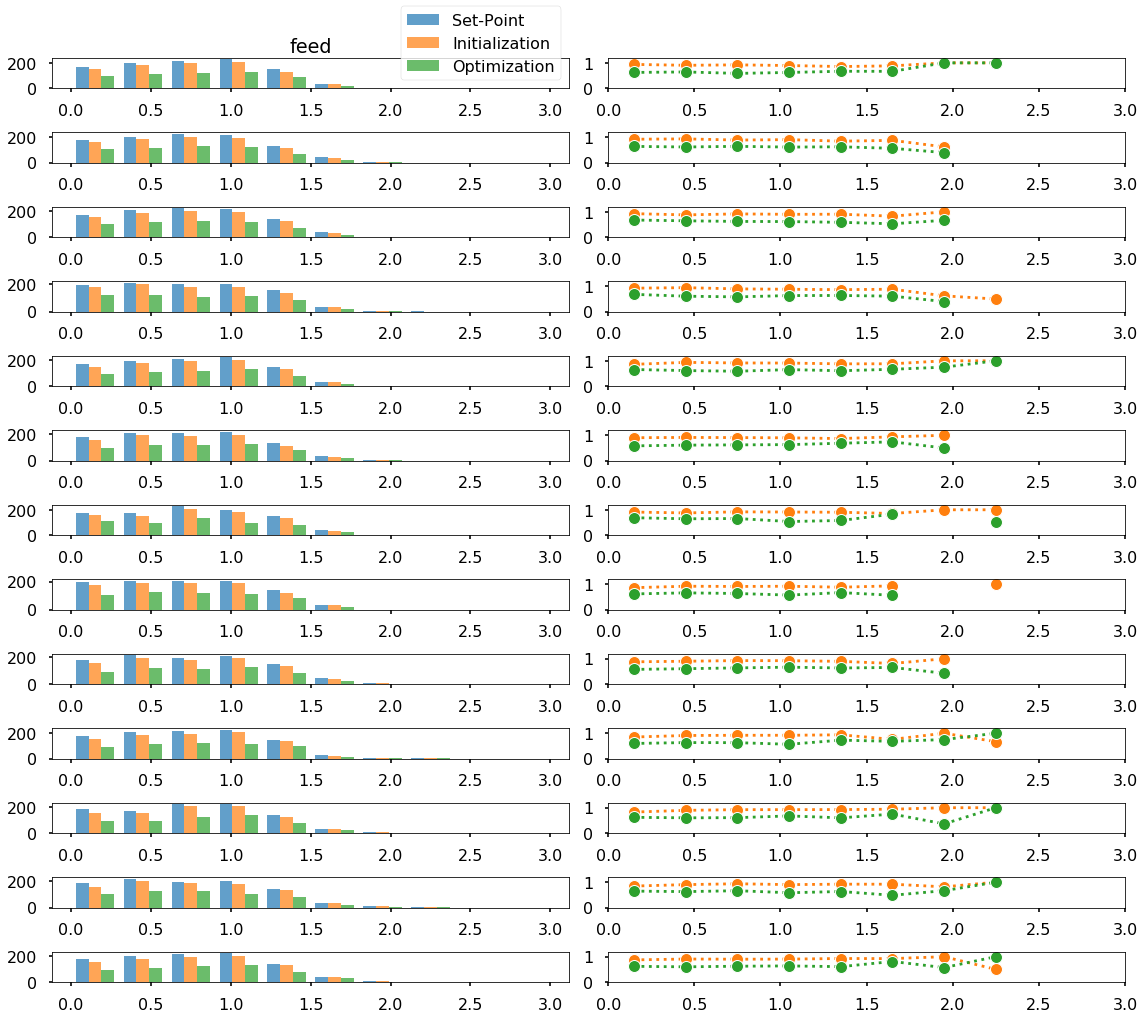

In [20]:
feed_all = {j:np.array([random_states[i].feed_flag[j] for i in random_states if i in total_runs])\
                   for j in reactive_stages}

fig, axs = plt.subplots(len(reactive_stages),2,figsize=(16,14))

for j_, j in enumerate(reactive_stages):
    y, bins, patches = axs[j_][0].hist(divide_data(feed_all[j]),bins=10,histtype='bar',range=(0,3),alpha=0.7)
    ymax = max(y[0])
    # ax.set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    axs[j_][1].plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].set_ylim(0,1.2)
    axs[j_][1].set_xlim(0,3)

axs[0][0].set_title('feed')
axs[0][0].legend(['Set-Point','Initialization','Optimization'])

plt.tight_layout()
plt.show()
plt.close()

# Reduce dimension for visulization using PCA, uniform distribution, expect to yield little capture

In [21]:
x_data = np.stack((
    reflux_ratio_all,
    intermediate_location_all,
    intermediate_draw_all,
    gasoline_location_all,
    gasoline_draw_all,
    diesel_location_all,
    diesel_draw_all,
    *[temperature_all[j] for j in temperature_all],
    *[catalyst_all[j] for j in temperature_all],
    *[feed_all[j] for j in temperature_all]
),axis=1)

## 46 features

In [22]:
x_data.shape

(995, 46)

In [23]:
center_scaled = StandardScaler().fit_transform(x_data)
pca = PCA(n_components=10)
scores = pca.fit_transform(center_scaled)

### Eigenvalues

In [24]:
pca.explained_variance_

array([7.19432287, 2.33590904, 1.44073989, 1.38079262, 1.33219727,
       1.31587609, 1.29715853, 1.26854427, 1.2052538 , 1.19761069])

### Captured Covariance

In [25]:
pca.explained_variance_ratio_

array([0.15624114, 0.0507296 , 0.03128895, 0.02998706, 0.0289317 ,
       0.02857725, 0.02817076, 0.02754933, 0.02617484, 0.02600885])

### Loadings - PC1 - Mostly independent, except temperature, which have same signs, meaning one temperature increases, the other ones increases, this response is modelled by sorting temperature from low to high

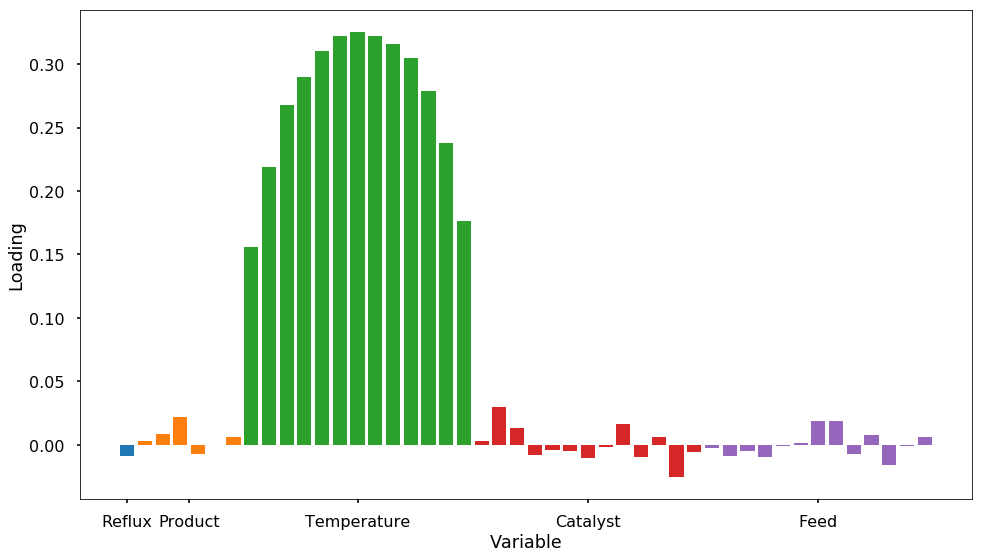

In [26]:
fig, axs = plt.subplots(figsize=(16,9))
x_loc = np.arange(1,len(pca.components_[0])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs.bar(x_loc[grouping[key]],pca.components_[0][grouping[key]])
axs.set_xticks([1,4.5,14,27,40])
axs.set_xticklabels(list(grouping.keys()))

axs.set_xlabel('Variable')
axs.set_ylabel('Loading')
plt.show()
plt.close()

### Scores - Success rate is not biased towards certain combination, uniform distributed set of initialized solutions for optimization multi-start

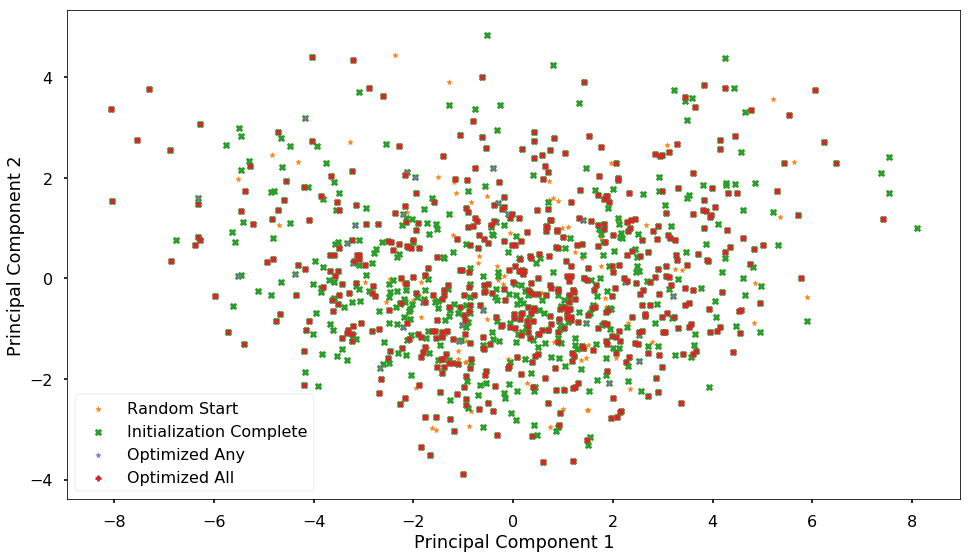

In [27]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Random Start', 'Initialization Complete', 'Optimized Any', 'Optimized All']
colors = ['C1', 'C2', 'C4','C3']
markers = ['*','x','*','+']
masks = {'Random Start':True,\
         'Initialization Complete':finished_initialization,\
         'Optimized Any':finished_optimization_any,\
         'Optimized All':finished_optimization_all}

for target, color,marker in zip(targets,colors,markers):
    mask = masks[target]
    axs.scatter(scores[:,0][mask],scores[:,1][mask],marker=marker,color=color,label=target,s=30)

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

# Second, let's take a look at cause of failure and performance

In [28]:
# initialization_failure_case
# DDF_product_failure_case
# revenue_failure_case
# DDF_reflux_failure_case
# profit_3_failure_case
# profit_3_1_failure_case
# profit_3_1_failure_case

In [29]:
failure_cause_list = []

for j in DDF_product_failure_case:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()
        for line in reversed(log_content):
            if line.startswith('>') or 'Working on' in line:
                break_cause = line.replace('> ','')
                failure_cause_list.append(break_cause)
                break

# print(len(failure_cause_list))

### Combine failure causes

In [30]:
failure_short = []
for line in failure_cause_list:
    
    if 'temperature' in line:
        start = 'Working on adjusting '
        end = 'temperature'
        failure_short.append(line[line.find(start) + len(start) : line.rfind(end)] + 'Temp')
    
    elif 'changing Q' in line:
        start = 'Working on '
        end = ','
        failure_short.append(line[line.find(start) + len(start) : line.rfind(end)] + ' duty')
    
    elif 'catalyst and feed' in line:
        start = 'alpha = '
        end = ':'
        failure_short.append('alpha: ' + line[line.find(start) + len(start) : line.rfind(end)] + ' feed/catalyst')
    
    elif 'Reflux' in line:
        start = 'PR ratio = '
        end = '\n'
        failure_short.append('PR-ratio: '+ line[line.find(start) + len(start) : line.rfind(end)] + ' reflux')
    
    elif 'Connect' in line:
        failure_short.append('stages 20 connect')
        
    elif 'DDF' in line:
        failure_short.append('add 3 DDF')
    
    else:
        failure_short.append(line.replace('\n',''))

In [31]:
failure_counts = Counter(failure_short)
failure_counts = sorted(dict(failure_counts).items(),key=lambda x: (x[0].split(' ')[-1],float(x[0].split(' ')[1])),reverse=False)
       
failure_dic = {}
for key, group in it.groupby(failure_counts,lambda pair: pair[0].split()[-1]):
    failure_dic[key] = list(group)

In [32]:
# failure_counts

In [33]:
failure_dic

{'DDF': [('add 3 DDF', 19)],
 'Temp': [('stage 9 Temp', 1),
  ('stage 11 Temp', 1),
  ('stage 14 Temp', 1),
  ('stage 15 Temp', 1),
  ('stage 17 Temp', 1),
  ('stage 18 Temp', 1),
  ('stage 20 Temp', 1)],
 'connect': [('stages 20 connect', 1)],
 'duty': [('stage 1 duty', 5),
  ('stage 2 duty', 3),
  ('stage 4 duty', 10),
  ('stage 5 duty', 5),
  ('stage 6 duty', 2),
  ('stage 7 duty', 7)],
 'feed/catalyst': [('alpha: 0.64 feed/catalyst', 1),
  ('alpha: 0.76 feed/catalyst', 2),
  ('alpha: 0.84 feed/catalyst', 7),
  ('alpha: 0.88 feed/catalyst', 4),
  ('alpha: 0.92 feed/catalyst', 13),
  ('alpha: 0.96 feed/catalyst', 14),
  ('alpha: 1.00 feed/catalyst', 14)],
 'reflux': [('PR-ratio: 0.14 reflux', 1)]}

In [34]:
sum(i[1] for i in failure_counts)

115

## Initialization failures

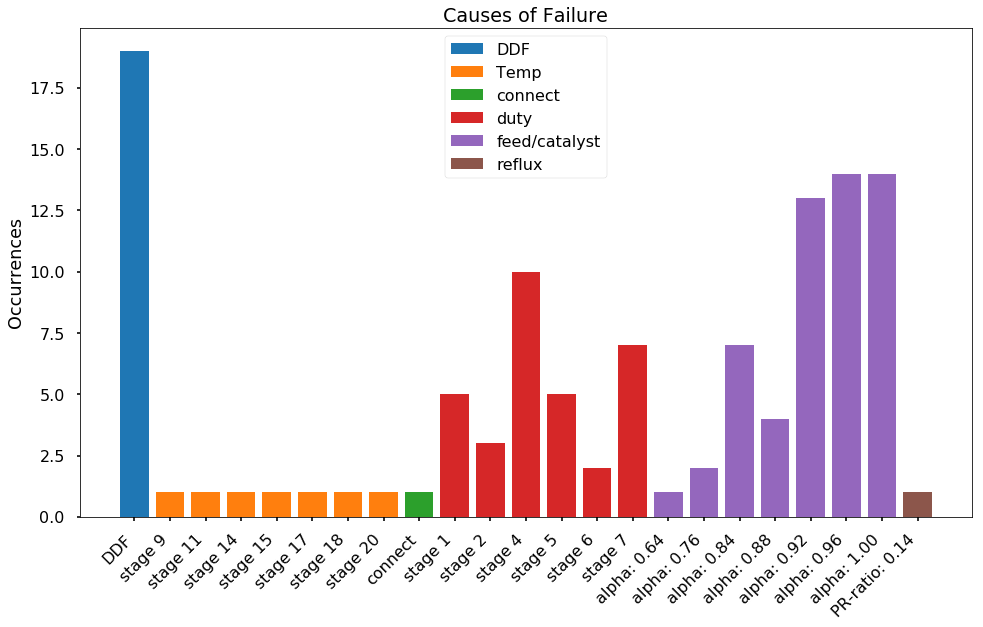

In [35]:
fig, axs = plt.subplots(figsize=(16,9))
loc = 0
names = []
for key in failure_dic.keys():
    frequencies = [j for i,j in failure_dic[key]]
#     names += [i[:i.rfind(' ')] for i,j in failure_dic[key]]
    
    for i,j in failure_dic[key]:
        if i == 'add 3 DDF':
            names += ['DDF']
        elif i == 'stages 20 connect':
            names += ['connect']
        else:
            names += [i[:i.rfind(' ')]]

    x_coordinates = np.arange(loc,len(failure_dic[key])+loc)
    axs.bar(x_coordinates, frequencies, align='center',label = key)
    loc += len(failure_dic[key])

axs.set_xticks(np.arange(loc))
axs.set_xticklabels(names,rotation=45,ha='right')

axs.set_ylabel('Occurrences')
axs.legend()
axs.set_title('Causes of Failure')
plt.show()

## Optimization Failure

In [36]:
revenue_fail_list = []
profit_3_fail_list = []
profit_3_1_fail_list = []
profit_3_2_fail_list = []

restoration_fail_case =[]

for j in [j for j in revenue_failure_case if j not in DDF_product_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    revenue_fail_list.append('Restoration Failed')
                    restoration_fail_case.append(j)
                else:
                    revenue_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break


for j in [j for j in profit_3_failure_case if j not in DDF_reflux_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    profit_3_fail_list.append('Restoration Failed')
                    restoration_fail_case.append(j)
                else:
                    profit_3_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break

        
for j in [j for j in profit_3_1_failure_case if j not in DDF_reflux_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    profit_3_1_fail_list.append('Restoration Failed')
                    restoration_fail_case.append(j)
                else:
                    profit_3_1_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break


for j in [j for j in profit_3_2_failure_case if j not in DDF_reflux_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    profit_3_2_fail_list.append('Restoration Failed')
                    restoration_fail_case.append(j)
                else:
                    profit_3_2_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break

In [37]:
Counter(revenue_fail_list), Counter(profit_3_fail_list), Counter(profit_3_1_fail_list), Counter(profit_3_2_fail_list) 

(Counter({'Maximum Number of Iterations Exceeded.': 304,
          'Restoration Failed': 11,
          'Converged to a point of local infeasibility. Problem may be infeasible.': 1}),
 Counter({'Restoration Failed': 2}),
 Counter({'Restoration Failed': 14}),
 Counter({'Restoration Failed': 1,
          'Maximum Number of Iterations Exceeded.': 11}))

# Lastly, optimization results

In [38]:
revenue_obj_list = []
revenue_case_list = []
revenue_opt_results = []
revenue_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_revenue[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Revenue' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '.'
                    string = line[line.find(start)+len(start):line.rfind(end)+4]
                    string = string.strip()
                    revenue_obj_list.append(float(string))
                    revenue_case_list.append(case)
                    break
            
            revenue_opt_results.append([log_content[-j+4]]+log_content[-j+14:-j+27]+log_content[-j+32:-j+37])
            revenue_opt_origin_results.append([log_content[-j-47]]+log_content[-j-37:-j-24]+log_content[-j-19:-j-14])
            
revenue_opt_results = [[data.split() for data in case] for case in revenue_opt_results]
revenue_opt_origin_results = [[data.split() for data in case] for case in revenue_opt_origin_results]

In [39]:
profit_3_obj_list = []
profit_3_case_list = []
profit_3_opt_results = []
profit_3_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_profit_3[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Profit 3' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '.'
                    string = line[line.find(start)+len(start):line.rfind(end)+4]
                    string = string.strip()
                    profit_3_obj_list.append(float(string))
                    profit_3_case_list.append(case)
                    break
            profit_3_opt_results.append([log_content[-j+4]]+log_content[-j+14:-j+27]+log_content[-j+32:-j+39])
            profit_3_opt_origin_results.append([log_content[-j-47]]+log_content[-j-37:-j-24]+log_content[-j-19:-j-14])
            
profit_3_opt_results = [[data.split() for data in case] for case in profit_3_opt_results]
profit_3_opt_origin_results = [[data.split() for data in case] for case in profit_3_opt_origin_results]

In [40]:
profit_3_1_obj_list = []
profit_3_1_case_list = []
profit_3_1_opt_results = []
profit_3_1_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_profit_3_1[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Profit 3-1' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '.'
                    string = line[line.find(start)+len(start):line.rfind(end)+4]
                    string = string.strip()
                    profit_3_1_obj_list.append(float(string))
                    profit_3_1_case_list.append(case)
                    break
            profit_3_1_opt_results.append([log_content[-j+4]]+log_content[-j+14:-j+27]+log_content[-j+32:-j+39])
            profit_3_1_opt_origin_results.append([log_content[-j-100]]+log_content[-j-90:-j-77]+log_content[-j-72:-j-67])

            
profit_3_1_opt_results = [[data.split() for data in case] for case in profit_3_1_opt_results]
profit_3_1_opt_origin_results = [[data.split() for data in case] for case in profit_3_1_opt_origin_results]

In [41]:
profit_3_2_obj_list = []
profit_3_2_case_list = []
profit_3_2_opt_results = []
profit_3_2_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_profit_3_2[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Profit 3-2' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '.'
                    string = line[line.find(start)+len(start):line.rfind(end)+4]
                    string = string.strip()
                    profit_3_2_obj_list.append(float(string))
                    profit_3_2_case_list.append(case)
                    break
            profit_3_2_opt_results.append([log_content[-j+4]]+log_content[-j+14:-j+27]+log_content[-j+32:-j+37])
            profit_3_2_opt_origin_results.append([log_content[-j-153]]+log_content[-j-143:-j-130]+log_content[-j-125:-j-120])

profit_3_2_opt_results = [[data.split() for data in case] for case in profit_3_2_opt_results]
profit_3_2_opt_origin_results = [[data.split() for data in case] for case in profit_3_2_opt_origin_results]

In [42]:
revenue_case_list[np.argmax(revenue_obj_list)], max(revenue_obj_list)

(63, 22.327)

In [43]:
revenue_case_list[np.argmin(revenue_obj_list)], min(revenue_obj_list)

(319, 21.279)

In [44]:
profit_3_case_list[np.argmax(profit_3_obj_list)], max(profit_3_obj_list)

(317, 2.155)

In [45]:
profit_3_1_case_list[np.argmax(profit_3_1_obj_list)], max(profit_3_1_obj_list)

(49, 2.901)

In [46]:
profit_3_2_case_list[np.argmax(profit_3_2_obj_list)], max(profit_3_2_obj_list)

(414, 6.294)

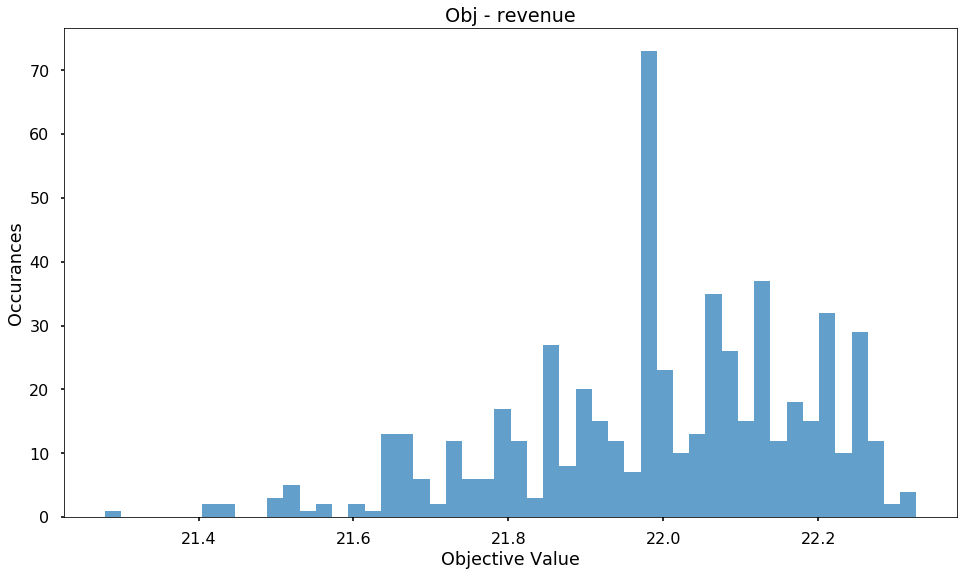

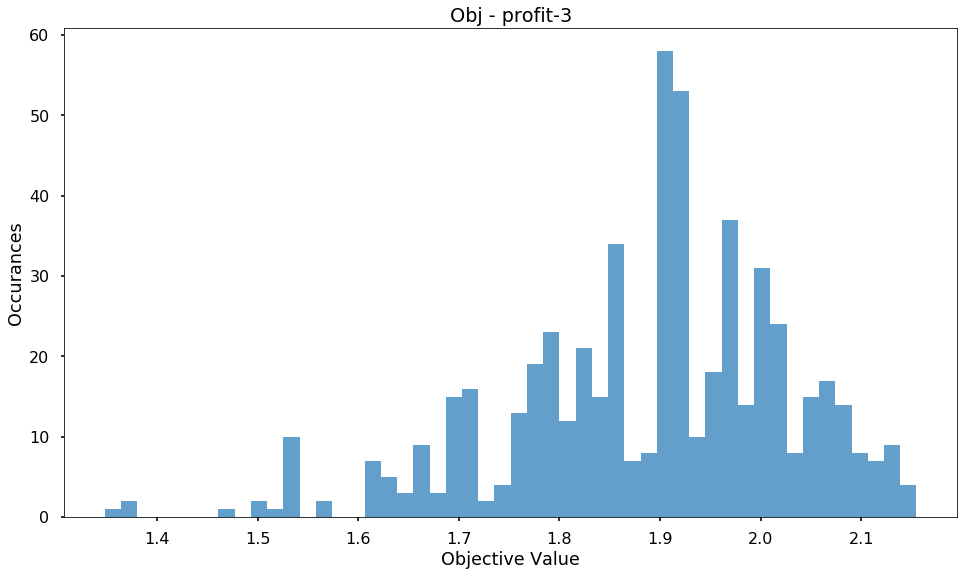

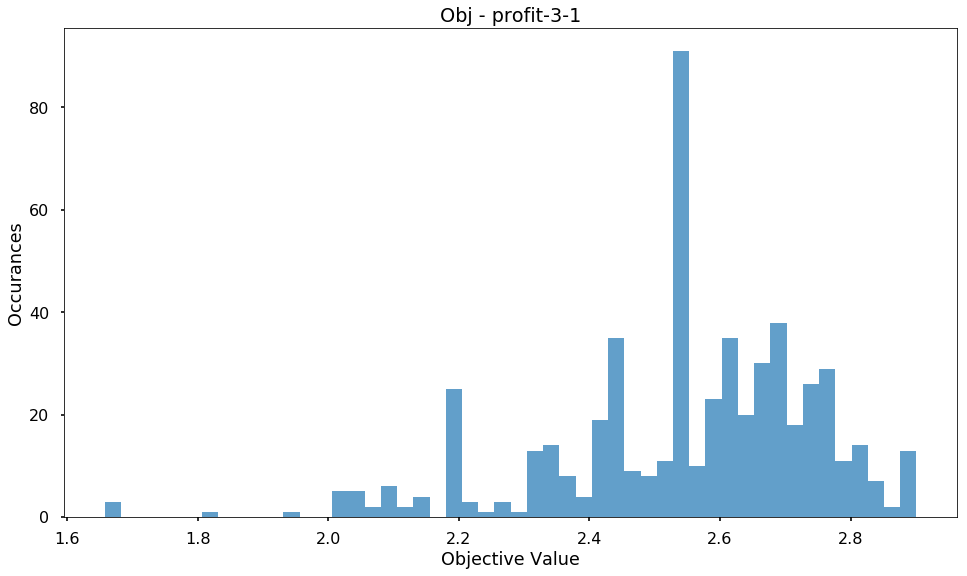

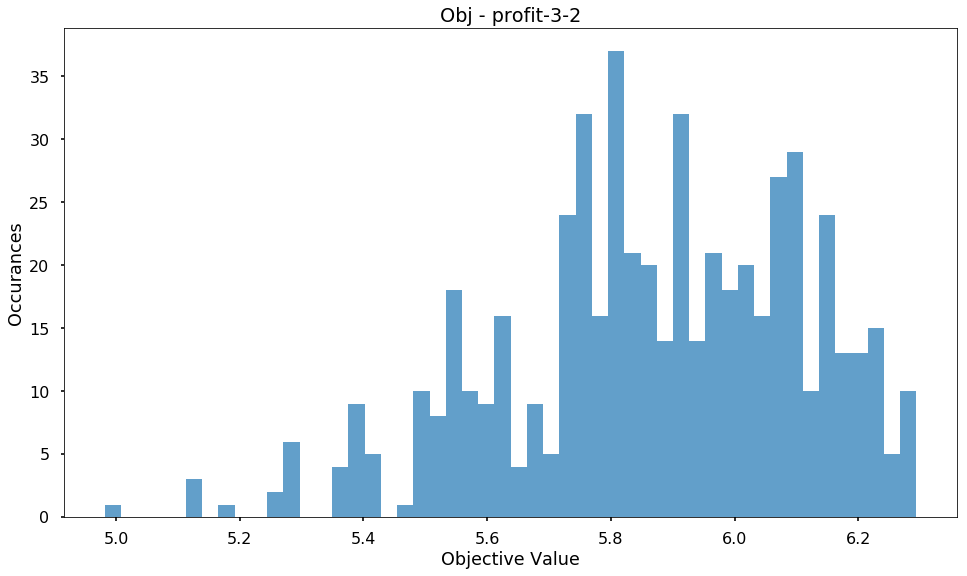

In [47]:
fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(revenue_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - revenue')
axs.set_xlabel('Objective Value')
axs.set_ylabel('Occurances')

fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(profit_3_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - profit-3')
axs.set_xlabel('Objective Value')
axs.set_ylabel('Occurances')

fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(profit_3_1_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - profit-3-1')
axs.set_xlabel('Objective Value')
axs.set_ylabel('Occurances')

fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(profit_3_2_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - profit-3-2')
axs.set_xlabel('Objective Value')
axs.set_ylabel('Occurances')

plt.show()

---

# Optimization result: obj-revenue

### Remove duplicates and sort

In [48]:
revenue_opt_results_matrix = np.stack((
    [float(case[0][-3])/float(case[0][-2]) for case in revenue_opt_results],
    [float(case[-1][-1]) for case in revenue_opt_results], # intermediate location
    [float(case[-1][-8]) for case in revenue_opt_results], # intermediate draw
    [float(case[-4][-1]) for case in revenue_opt_results], # gasoline location
    [float(case[-4][-8]) for case in revenue_opt_results], # gasoline draw
    [float(case[-3][-1]) for case in revenue_opt_results], # diesel location
    [float(case[-3][-8]) for case in revenue_opt_results], # diesel draw
#     [float(case[-5][-8]) for case in revenue_opt_results], # naphtha draw
#     [float(case[-2][-8]) for case in revenue_opt_results], # heavy draw
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in revenue_opt_results]).T,
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in revenue_opt_results]).T,
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in revenue_opt_results]).T,
    [obj for obj in revenue_obj_list]
),axis=1)

In [49]:
revenue_opt_origin_matrix = np.stack((
    [float(case[0][-3])/float(case[0][-2]) for case in revenue_opt_origin_results],
    [float(case[-1][-1]) for case in revenue_opt_origin_results], # intermediate location
    [float(case[-1][-8]) for case in revenue_opt_origin_results], # intermediate draw
    [float(case[-4][-1]) for case in revenue_opt_origin_results], # gasoline location
    [float(case[-4][-8]) for case in revenue_opt_origin_results], # gasoline draw
    [float(case[-3][-1]) for case in revenue_opt_origin_results], # diesel location
    [float(case[-3][-8]) for case in revenue_opt_origin_results], # diesel draw
#     [float(case[-5][-8]) for case in revenue_opt_origin_results], # naphtha draw
#     [float(case[-2][-8]) for case in revenue_opt_origin_results], # heavy draw
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in revenue_opt_origin_results]).T,
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in revenue_opt_origin_results]).T,
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in revenue_opt_origin_results]).T,
    [obj for obj in revenue_obj_list]
),axis=1)

In [50]:
revenue_opt_results_unique_unsorted, revenue_unique_index, revenue_unique_counts = \
np.unique(revenue_opt_results_matrix,axis=0,return_index=True,return_counts=True)

In [51]:
revenue_unique_global_index = [np.array(total_runs)[finished_revenue][j] for j in revenue_unique_index]
revenue_opt_results_unique = np.array(sorted(revenue_opt_results_unique_unsorted,key=lambda x: x[-1]))

In [52]:
pd.options.display.precision = 4
pd.DataFrame(sorted([i for i in zip(revenue_opt_results_unique_unsorted[:,-1],revenue_unique_counts,revenue_unique_global_index)],\
                    key=lambda x: x[0]),columns=['Objective Value','Occurances','Example Index'])

,Objective Value,Occurances,Example Index
0,21.279,1,319
1,21.411,1,934
2,21.419,1,434
3,21.435,2,119
4,21.489,1,931
5,21.496,1,115
6,21.505,1,775
7,21.516,2,190
8,21.530,1,751
9,21.530,2,21


### Raw Data

In [53]:
pd.options.display.expand_frame_repr = False
pd.options.display.max_colwidth = 80000
pd.options.display.max_columns = None
pd.options.display.max_rows = 80000

In [54]:
pd.options.display.precision = 0
pd.DataFrame(revenue_opt_results_unique[::4,7:20].T,index=['Tem{}'.format(j) for j in range(8,21)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
Tem8,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
Tem9,244,241,242,243,240,239,242,240,240,241,239,241,241,239,238,248,240,241,241,240,240,240,239,241,240,241,226,226,231,240,241,248,238,240,239,240,238,227,241,241,241,228,239,241,240,239,227,240,239,240,240,240,241,223,241,232,225,239,239,228,240,240,239,240,240,224,240,240,240,226,239,240,240,239,239,239,239,239,240,239,240,239,240,225,239,240,239,238,238,230,238,231,240,224,240,224,240,240,240
Tem10,244,232,234,291,238,238,242,238,238,240,238,278,238,238,238,282,238,200,240,238,240,239,222,241,240,272,241,240,241,239,276,281,222,240,239,239,238,241,240,232,242,240,238,273,239,220,240,239,239,275,240,241,240,239,232,241,240,238,238,240,255,240,265,239,240,239,240,241,239,240,239,240,240,262,239,239,239,239,239,239,239,240,240,240,238,239,240,252,238,240,239,240,240,240,240,240,239,260,240
Tem11,249,200,264,300,232,237,242,232,232,243,229,294,232,236,237,299,236,210,240,252,241,238,238,286,246,280,240,240,241,263,289,297,238,240,238,238,237,225,241,241,286,239,237,280,239,238,240,239,239,285,240,280,271,238,241,241,239,237,238,240,240,239,281,238,239,239,239,242,238,239,238,272,240,276,238,239,238,258,257,254,239,239,271,239,238,238,272,266,255,273,238,272,272,239,240,240,239,272,239
Tem12,253,200,232,239,203,232,255,230,200,240,237,238,200,235,236,239,231,216,251,232,250,248,237,238,294,239,240,240,287,238,238,239,237,240,237,264,236,234,281,248,239,238,235,239,238,237,240,238,245,239,239,238,275,237,241,283,238,236,251,240,281,244,288,238,272,238,259,281,238,239,238,275,240,279,237,239,237,240,270,239,239,240,271,238,238,238,270,279,239,270,238,270,271,239,240,239,238,266,239
Tem13,230,221,239,232,236,233,231,253,227,231,232,238,223,232,232,238,217,254,231,240,237,238,236,230,237,232,275,241,297,248,237,238,236,253,241,270,235,280,238,238,237,245,234,237,247,236,285,270,286,237,239,265,238,236,284,238,270,235,237,280,288,278,238,238,276,238,239,238,237,276,237,238,277,238,260,239,237,280,278,240,270,241,238,267,239,268,239,279,278,239,268,239,238,239,272,239,238,239,271
Tem14,245,226,238,244,244,265,246,241,238,238,235,232,227,237,236,232,237,259,246,254,243,237,232,239,247,236,241,240,238,278,264,237,235,231,247,268,235,282,231,239,230,264,230,231,246,231,293,266,271,235,253,236,231,235,237,236,268,235,237,236,238,237,237,250,237,244,240,236,270,280,237,236,237,236,267,240,267,285,279,272,269,273,236,272,273,262,237,238,279,238,276,237,237,272,237,270,268,238,268
Tem15,200,237,234,200,236,246,240,234,240,236,262,243,237,260,264,245,244,253,240,242,231,231,237,237,231,236,259,258,232,246,231,231,231,246,245,261,231,238,238,231,239,231,228,238,230,241,237,231,237,243,277,230,237,231,231,238,236,231,237,239,237,231,237,266,231,273,272,230,247,236,238,230,239,266,262,275,264,237,238,237,236,237,230,272,271,264,236,237,237,237,275,236,236,269,237,270,268,236,237
Tem16,200,234,236,200,234,200,218,235,233,234,245,205,236,244,246,200,236,254,235,236,245,246,262,234,244,233,249,269,243,231,244,248,239,240,230,231,240,232,236,236,236,238,230,236,240,255,231,239,231,230,231,238,236,244,238,239,256,245,269,255,231,238,231,230,237,236,231,238,265,260,267,238,230,236,264,236,266,236,236,237,230,236,237,236,264,236,235,236,236,236,237,230,230,237,236,236,236,230,236
Tem17,200,231,236,200,234,200,212,236,234,232,300,200,232,203,200,200,235,253,237,233,200,200,24

In [55]:
pd.options.display.precision = 0
pd.DataFrame(revenue_opt_results_unique[::4,20:33].T,index=['Catalyst {}'.format(j) for j in range(8,21)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
Catalyst 8,10,37,10,10,10,38,10,10,10,10,23,10,10,13,30,10,10,10,10,10,10,10,20,10,10,10,10,10,10,10,10,10,18,10,10,10,25,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Catalyst 9,908,11956,9290,2779,8695,5965,3033,8330,8779,6323,6292,5206,8892,6422,5011,28,6910,10753,4095,8228,3494,3916,5335,3141,3311,5600,32,32,21,4868,3136,28,4504,3372,4341,5572,3809,30,4144,4651,2177,28,5064,3500,4048,5382,29,4044,3366,1978,2707,2609,4230,37,3003,18,34,3799,3245,28,2363,3320,1874,3455,3315,36,3039,1920,3249,32,2543,2838,2622,2602,3448,1879,2810,1968,2951,1882,2879,1441,2829,35,2444,3020,1173,1045,915,22,1359,21,1893,37,1848,36,2426,2551,1896
Catalyst 10,8432,17905,10,10,7767,5719,3023,7439,7832,7367,6434,10,7912,6104,4993,10,6513,10,4037,7419,6968,7936,10,2865,4516,10,2498,2194,3413,4830,10,10,10,3528,4414,5399,4001,7003,4825,10,1945,5386,5068,10,4139,10,2847,4134,3556,10,2982,2589,4246,4635,10,2825,4128,3988,3492,3611,10,3512,10,3653,3513,3356,3277,2191,3482,3613,2866,3058,2903,10,3674,2263,3114,2352,3233,2276,3147,1864,3060,3957,2792,3289,1556,10,1445,1077,1817,2746,2219,2181,2218,2977,2756,10,2279
Catalyst 11,10,10,124,10,13436,4906,5041,14128,13288,10,10,10,13094,5990,4591,10,5673,10,5115,10,10,10,5183,10,10,10,2562,2292,3180,10,10,10,4596,3258,4097,4802,3866,10,10,4584,10,5024,4720,10,3825,5280,2871,3826,4281,10,2937,10,10,4525,3160,2454,4056,3848,3426,3513,2721,3785,10,3517,3329,3395,3206,1758,3391,3587,2868,10,2811,10,3569,2322,3095,10,10,10,3058,1951,10,3911,2813,3233,10,10,10,10,1931,10,10,2338,2221,3051,2763,10,2337
Catalyst 12,10,10,20483,7748,10,13283,10,10,10,10,4963,9341,10,10,3827,6967,10811,10,10,14241,10,10,4680,6560,10,7956,2438,2185,10,5485,6393,4535,4289,3943,6646,10,3619,10,10,10,5106,4830,4243,6040,4500,4783,2553,3210,10,4945,2770,5358,10,4243,2654,10,3785,3608,10,3021,10,10,10,3191,10,3273,10,10,3185,3325,2791,10,2422,10,3371,2296,2983,2356,10,2399,2746,1883,10,3701,2917,3052,10,10,1507,10,1960,10,10,2352,1931,2973,2632,10,2259
Catalyst 13,20541,10,10,19356,10,10,18799,10,10,16206,12170,10,10,11375,11457,7772,10,10,16656,10,6907,10,3891,17333,6437,16340,10,1423,10,10,7344,6245,3849,10,10,10,3227,10,6405,6630,6443,10,3627,6688,10,4059,10,10,10,6203,2336,10,6735,3830,10,5878,10,3251,3317,10,10,10,5104,2978,10,3478,2939,4933,2797,10,2627,5474,10,5682,10,2113,2748,10,10,2022,10,1304,5389,10,10,10,3624,10,10,3095,10,4924,4474,2232,10,2743,2331,5006,10
Catalyst 14,10,10,10,10,10,10,10,10,10,10,10,15331,10,10,10,15115,10,10,10,10,10,5464,10791,10,261,10,4025,4863,7308,10,10,6084,3107,15803,10,10,2504,10,14530,10,14236,10,6907,13673,10,10398,10,10,10,6872,154,6325,14688,3189,6147,7845,10,2675,2859,6865,5809,5741,5930,10,6073,10,2138,5940,10,10,2279,5981,5998,6321,10,1491,10,10,10,10,10,10,5940,10,10,10,4535,4008,10,4092,10,5533,5187,10,4879,10,10,5519,10
Catalyst 15,16,10,10,16,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,12505,12558,10,10,15358,10,10,10,15936,271,13002,12985,9531,10,10,10,8852,8081,10,14030,10,14639,10,10,13391,10,6654,14690,5951,10,10,13019,10,9477,14939,10,5894,8767,2122,10,6274,13548,5570,10,13676,10,10,13168,233,6463,1666,12553,10,10,10,10,10,5413,6039,4920,5671,4528,12678,10,10,10,4671,4733,4010,4250,10,5387,5124,10,10,10,10,5392,4723
Catalyst 16,12,10,10,11,10,12,17,10,10,10,10,20,10,10,10,21,10,10,10,10,10,10,10,10,10,10,228,10,10,14420,10,10,10,10,10380,14107,10,14766,10,10,10,10,302,10,10,10,14930,10,12717,9875,16026,10,10,10,10,10,10,10,10,10,12703,10,11386,13109,10,5146,15294,10,10,10,10,10,13146,5353,10,5400,10,5819,5985,10,12403,5310,10,6776,10,5523,4542,4673,4746,4186,447

In [56]:
pd.options.display.precision = 2
pd.DataFrame(revenue_opt_results_unique[::4,33:-1].T,index=['Feed {}'.format(j) for j in range(8,21)]).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
Feed 8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Feed 9,0.21,2.34,0.00,0.60,1.66,1.08,0.62,1.59,1.68,1.26,1.14,1.04,1.71,1.16,0.88,0.00,1.27,0.00,0.80,1.57,0.67,0.74,0.00,0.64,0.63,1.13,0.00,0.00,0.00,0.90,0.60,0.00,0.00,0.64,0.78,1.04,0.65,0.00,0.80,0.00,0.42,0.00,0.89,0.68,0.75,0.00,0.00,0.75,0.61,0.37,0.51,0.50,0.82,0.00,0.00,0.00,0.00,0.66,0.56,0.00,0.43,0.62,0.33,0.63,0.62,0.00,0.56,0.36,0.58,0.00,0.44,0.53,0.48,0.46,0.61,0.33,0.49,0.35,0.53,0.33,0.52,0.26,0.53,0.00,0.42,0.54,0.21,0.17,0.15,0.00,0.23,0.00,0.34,0.00,0.33,0.00,0.43,0.47,0.34
Feed 10,0.00,0.00,2.01,0.01,1.65,1.18,0.70,1.58,1.67,0.00,0.00,0.00,1.69,1.27,0.98,0.00,1.38,0.00,0.89,1.58,0.00,0.00,0.94,0.65,0.00,0.00,0.49,0.42,0.68,0.99,0.00,0.00,0.78,0.74,0.88,1.14,0.74,0.00,0.00,0.91,0.42,1.03,0.99,0.00,0.85,0.97,0.55,0.85,0.71,0.00,0.60,0.54,0.91,0.82,0.58,0.55,0.76,0.75,0.66,0.68,0.01,0.72,0.00,0.72,0.72,0.61,0.66,0.44,0.68,0.67,0.54,0.62,0.58,0.00,0.70,0.43,0.58,0.45,0.63,0.43,0.62,0.35,0.62,0.73,0.51,0.64,0.29,0.00,0.25,0.19,0.33,0.52,0.43,0.39,0.43,0.55,0.53,0.00,0.44
Feed 11,0.00,0.00,0.00,0.03,0.00,1.08,0.00,0.00,0.00,0.00,1.34,0.03,0.00,0.00,1.02,0.02,1.27,0.00,0.00,0.00,0.00,0.00,1.03,0.02,0.97,0.02,0.54,0.46,0.69,0.01,0.02,0.02,0.88,0.76,0.92,1.12,0.78,0.00,1.05,0.00,0.02,1.09,1.03,0.02,0.88,1.06,0.59,0.88,0.00,0.02,0.64,0.02,0.01,0.88,0.66,0.52,0.81,0.79,0.69,0.72,0.54,0.00,0.01,0.76,0.74,0.66,0.69,0.39,0.72,0.73,0.57,0.01,0.61,0.01,0.74,0.46,0.62,0.01,0.00,0.01,0.65,0.38,0.01,0.79,0.55,0.68,0.01,0.00,0.01,0.01,0.36,0.01,0.01,0.44,0.46,0.60,0.56,0.01,0.47
Feed 12,2.04,0.00,0.00,1.56,0.00,0.00,1.25,0.00,0.00,1.68,1.11,0.00,0.00,1.34,0.86,1.34,0.00,2.16,1.22,0.00,1.54,0.00,1.06,1.36,0.02,1.67,0.54,0.48,0.01,0.00,1.29,0.84,0.91,0.00,0.00,0.00,0.82,1.39,0.02,1.05,1.07,0.00,1.05,1.25,0.00,1.09,0.57,0.77,0.94,0.96,0.66,1.12,0.02,0.91,0.62,0.02,0.83,0.82,0.01,0.69,0.01,0.86,0.02,0.77,0.01,0.69,0.01,0.02,0.74,0.74,0.60,0.02,0.57,0.02,0.76,0.49,0.65,0.49,0.00,0.49,0.64,0.40,0.01,0.81,0.00,0.69,0.01,0.01,0.28,0.01,0.38,0.01,0.01,0.47,0.43,0.63,0.58,0.01,0.48
Feed 13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.00,0.00,1.63,0.00,0.00,0.00,0.00,0.00,1.73,0.89,0.00,1.44,0.00,0.02,0.35,0.03,1.35,1.57,1.26,0.93,0.97,0.00,0.00,0.82,0.00,1.38,0.00,1.37,1.14,0.87,1.44,0.00,0.93,0.01,0.00,0.01,1.31,0.62,0.01,1.44,0.93,0.02,1.22,0.01,0.82,0.74,0.02,0.02,0.02,0.96,0.00,0.02,0.00,0.72,1.05,0.72,0.01,0.62,1.16,0.02,1.08,0.00,0.48,0.65,0.01,0.01,0.45,0.01,0.30,1.15,0.00,0.62,0.01,0.70,0.01,0.01,0.58,0.00,0.97,0.90,0.48,0.02,0.63,0.56,0.99,0.01
Feed 14,7.74,0.00,0.00,7.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.52,1.22,0.00,0.00,0.00,0.00,0.00,0.00,1.50,0.02,0.00,1.35,0.72,0.00,0.00,0.00,0.57,0.02,0.00,1.46,0.00,0.00,0.00,0.00,1.11,0.00,0.03,0.00,0.02,0.00,0.00,1.36,0.00,0.73,1.31,0.00,0.02,0.61,0.72,0.00,1.19,1.25,1.25,0.74,1.31,0.82,0.52,1.28,0.02,0.02,0.59,1.31,0.00,1.34,0.01,0.38,0.01,0.02,0.02,0.02,0.02,0.02,1.30,0.01,0.01,0.00,0.93,0.71,0.02,0.79,0.01,1.20,1.14,0.01,0.00,0.01,0.01,1.20,0.01
Feed 15,0.00,0.00,7.97,0.00,6.67,6.65,7.42,6.81,0.00,7.05,0.00,6.99,0.00,0.00,0.00,6.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,1.22,0.00,0.00,0.00,0.00,0.00,0.00,1.65,0.00,0.00,

# Analysis

# Manual Scaling

In [57]:
scaling_object = StandardScaler().fit(revenue_opt_results_unique[:,:-1])

In [58]:
center_scaled = scaling_object.transform(revenue_opt_results_unique[:,:-1])
pca = PCA(n_components=10)
scores = pca.fit_transform(center_scaled)

### Eigenvalues

In [59]:
pca.explained_variance_

array([7.48845333, 4.71233628, 3.03560216, 2.29330021, 2.1034559 ,
       1.85913642, 1.71338671, 1.57808256, 1.54759946, 1.40986842])

### Captured Covariance

In [60]:
pca.explained_variance_ratio_

array([0.17370807, 0.10931107, 0.07041622, 0.0531972 , 0.04879342,
       0.043126  , 0.03974507, 0.03660645, 0.03589934, 0.03270442])

In [61]:
sum(pca.explained_variance_ratio_[:5])

0.45542598981239907

### Corrolation between PC1 and optimized objective value?

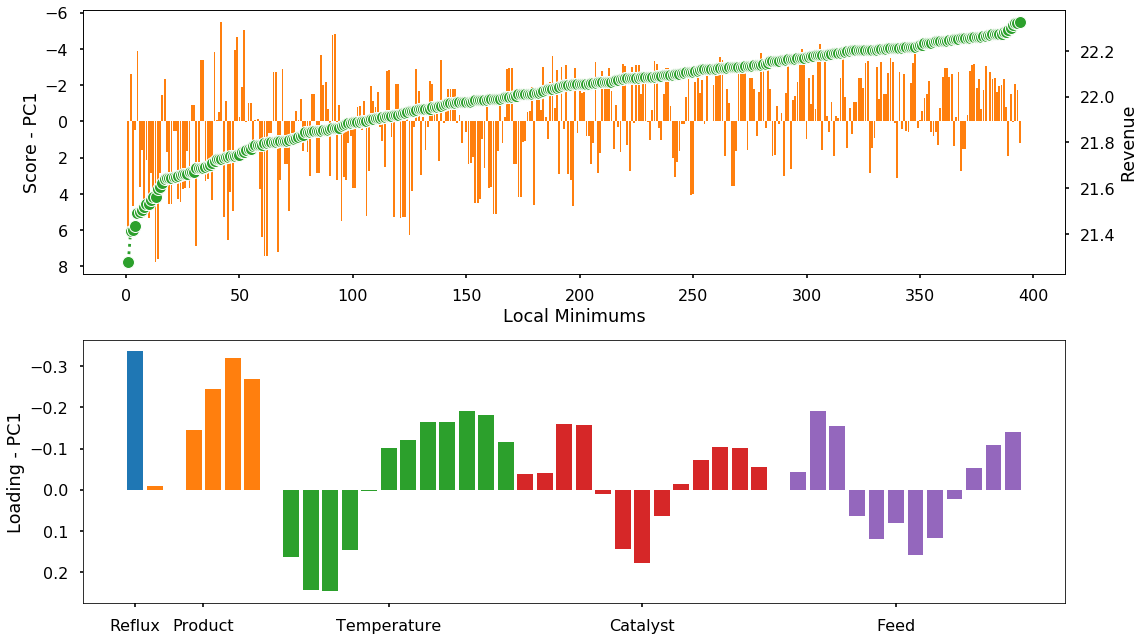

In [62]:
fig, axs = plt.subplots(2,1,figsize=(16,9))

'''
Scores
'''
x_loc = np.arange(1,len(scores[:,0])+1)
axs[0].bar(x_loc,scores[:,0],color = 'C1')

axs_ = axs[0].twinx()
axs_.plot(x_loc,revenue_opt_results_unique[:,-1],'C2:o',markeredgecolor='w',markeredgewidth = 1,markersize=12)

# axs[1].legend()
axs[0].set_xlabel('Local Minimums')
axs[0].invert_yaxis()
axs[0].set_ylabel('Score - PC1')
axs_.set_ylabel('Revenue')

'''
Loading
'''
x_loc = np.arange(1,len(pca.components_[0])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs[1].bar(x_loc[grouping[key]],pca.components_[0][grouping[key]])
axs[1].set_xticks([1,4.5,14,27,40])
axs[1].set_xticklabels(list(grouping.keys()))

axs[1].set_ylabel('Loading - PC1')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()
plt.close()

In [63]:
pc1_pos = scores[:,0] >= 0
pc1_neg = scores[:,0] < 0

In [64]:
scores[:,1][pc1_pos][-1]

-2.278032569503892

In [65]:
# best positive case
revenue_case_list[revenue_obj_list.index(revenue_opt_results_unique[pc1_pos][-1][-1])], revenue_opt_results_unique[pc1_pos][-1][-1]

(63, 22.327)

In [66]:
# best negative case
revenue_case_list[revenue_obj_list.index(revenue_opt_results_unique[pc1_neg][-1][-1])], revenue_opt_results_unique[pc1_neg][-1][-1]

(307, 22.324)

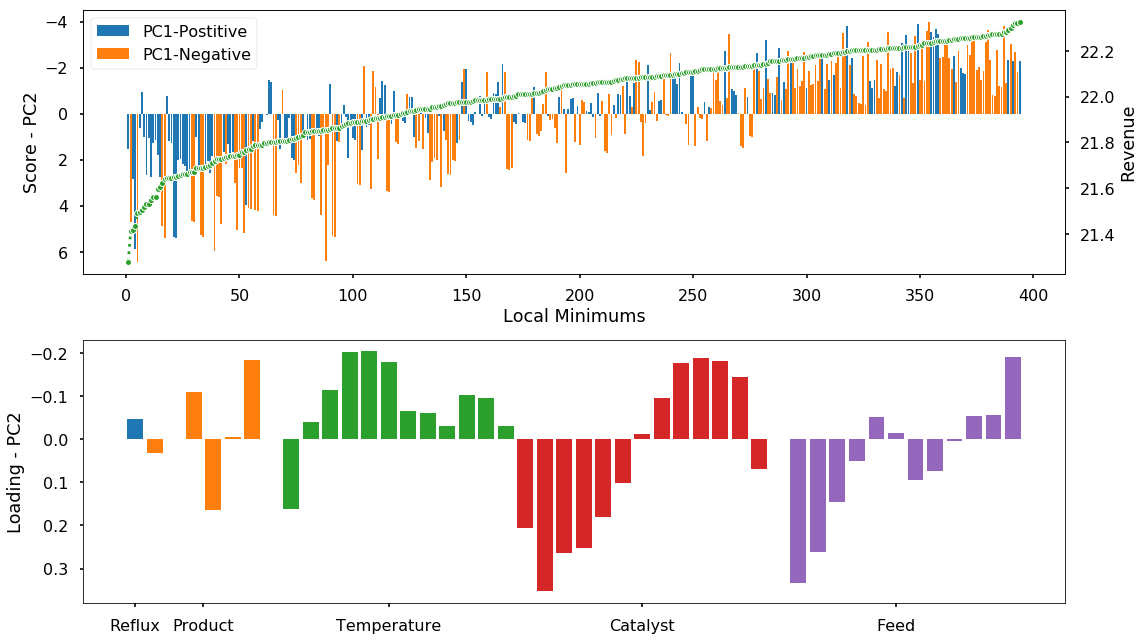

In [67]:
fig, axs = plt.subplots(2,1,figsize=(16,9))

'''
Scores
'''
x_loc = np.arange(1,len(scores[:,1])+1)
axs[0].bar(x_loc[pc1_pos],scores[:,1][pc1_pos],color = 'C0',label='PC1-Postitive')
axs[0].bar(x_loc[pc1_neg],scores[:,1][pc1_neg],color = 'C1',label='PC1-Negative')

axs_ = axs[0].twinx()
axs_.plot(x_loc,revenue_opt_results_unique[:,-1],'C2:o',markeredgecolor='w',markeredgewidth = 1,markersize=6)

axs[0].legend()

# axs[1].legend()
axs[0].set_xlabel('Local Minimums')
axs[0].invert_yaxis()
axs[0].set_ylabel('Score - PC2')
axs_.set_ylabel('Revenue')

'''
Loading
'''
x_loc = np.arange(1,len(pca.components_[1])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs[1].bar(x_loc[grouping[key]],pca.components_[1][grouping[key]])
axs[1].set_xticks([1,4.5,14,27,40])
axs[1].set_xticklabels(list(grouping.keys()))

axs[1].set_ylabel('Loading - PC2')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()
plt.close()

### Predictions using pre-optimization data

In [68]:
revenue_opt_origin_scaled = scaling_object.transform(revenue_opt_origin_matrix[:,:-1])

In [69]:
predicted_scores = pca.transform(revenue_opt_origin_scaled)

cut-off:
* 100
* 250
* 350
* rest

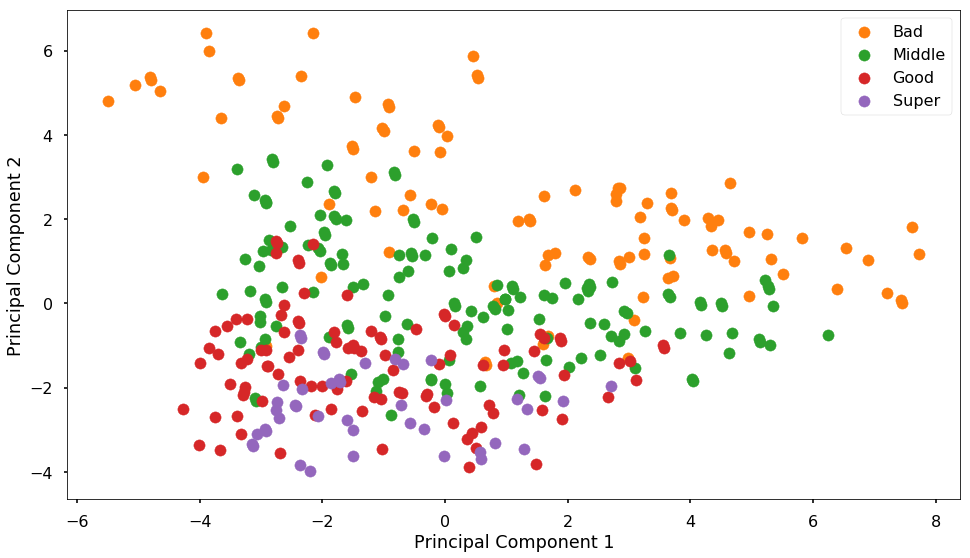

In [70]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
masks = {'Bad':[[0,21.54],slice(0,100),80],\
         'Middle':[[21.55,21.80],slice(100,250),10],\
         'Good':[[21.81,22.07],slice(250,350),10],\
         'Super':[[22.08,22.33],slice(350,None),80]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,0][mask[1]],scores[:,1][mask[1]],color=color,label=target)

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

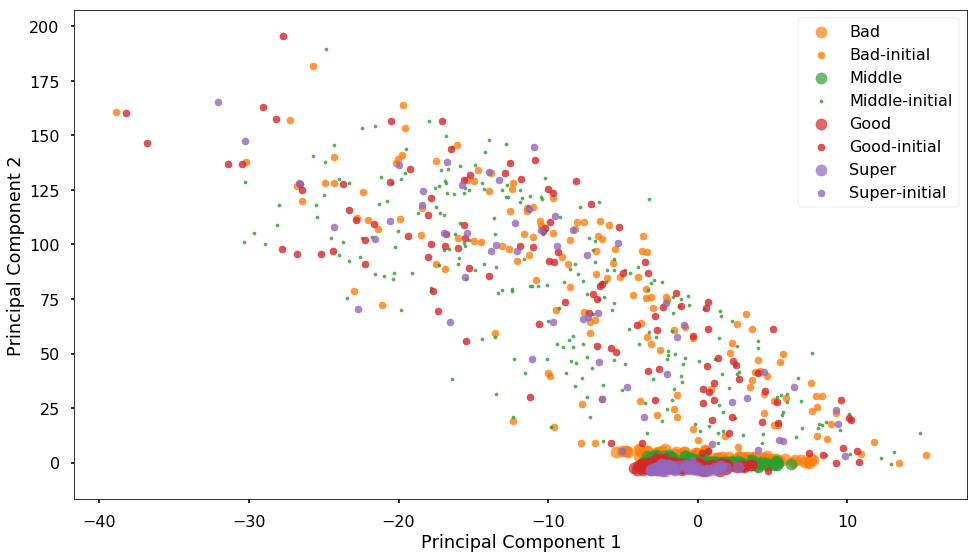

In [71]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
masks = {'Bad':[[0,revenue_opt_results_unique[100][-1]],slice(0,100),50],\
         'Middle':[[revenue_opt_results_unique[100][-1],revenue_opt_results_unique[250][-1]],slice(100,250),10],\
         'Good':[[revenue_opt_results_unique[250][-1],revenue_opt_results_unique[350][-1]],slice(250,350),50],\
         'Super':[[revenue_opt_results_unique[350][-1],revenue_opt_results_unique[-1][-1]+0.1],slice(350,None),50]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,0][mask[1]],scores[:,1][mask[1]],color=color,label=target,alpha=0.7)
    tmp = [j for j,run in enumerate(revenue_opt_origin_matrix) if run[-1] >= mask[0][0] and run[-1] < mask[0][1]]
    axs.scatter(predicted_scores[:,0][tmp],predicted_scores[:,1][tmp],color=color,label=target+'-initial',alpha=0.8,s=mask[-1])

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

### Separating between "Middle" and "Good" will involve 2rd and 3th component?

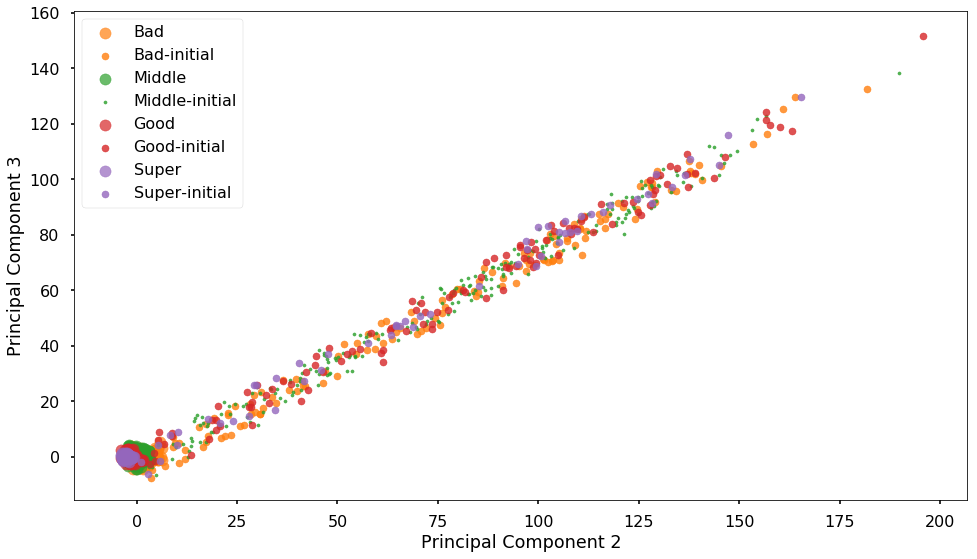

In [72]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
masks = {'Bad':[[0,revenue_opt_results_unique[100][-1]],slice(0,100),50],\
         'Middle':[[revenue_opt_results_unique[100][-1],revenue_opt_results_unique[250][-1]],slice(100,250),10],\
         'Good':[[revenue_opt_results_unique[250][-1],revenue_opt_results_unique[350][-1]],slice(250,350),50],\
         'Super':[[revenue_opt_results_unique[350][-1],revenue_opt_results_unique[-1][-1]+0.1],slice(350,None),50]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,1][mask[1]],scores[:,2][mask[1]],color=color,label=target,alpha=0.7)
    tmp = [j for j,run in enumerate(revenue_opt_results_matrix) if run[-1] >= mask[0][0] and run[-1] < mask[0][1]]
    axs.scatter(predicted_scores[:,1][tmp],predicted_scores[:,2][tmp],color=color,label=target+'-initial',alpha=0.8,s=mask[-1])

axs.legend()
axs.set_xlabel('Principal Component 2')
axs.set_ylabel('Principal Component 3')

plt.show()
plt.close()

---

# Optimization results: profit-3

### Remove duplicates and sort

In [73]:
pd.options.display.max_colwidth = 80
pd.options.display.max_rows = 80

In [74]:
profit_3_opt_results_matrix = np.stack((
    [float(case[0][-3])/float(case[0][-2]) for case in profit_3_opt_results],
    [float(case[-3][-1]) for case in profit_3_opt_results], # intermediate location
    [float(case[-3][-8]) for case in profit_3_opt_results], # intermediate draw
    [float(case[-6][-1]) for case in profit_3_opt_results], # gasoline location
    [float(case[-6][-8]) for case in profit_3_opt_results], # gasoline draw
    [float(case[-5][-1]) for case in profit_3_opt_results], # diesel location
    [float(case[-5][-8]) for case in profit_3_opt_results], # diesel draw
#     [float(case[-7][-8]) for case in profit_3_opt_results], # naphtha draw
#     [float(case[-4][-8]) for case in profit_3_opt_results], # heavy draw
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in profit_3_opt_results]).T, # Temperature
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in profit_3_opt_results]).T, # Catalyst
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in profit_3_opt_results]).T, # Feed
    [round(float(case[-2][-1]),3) for case in profit_3_opt_results], # Reflux tray
    [round(float(case[-1][-1]),3) for case in profit_3_opt_results], # Total feed
    [obj for obj in profit_3_obj_list]
),axis=1)

In [75]:
profit_3_opt_origin_matrix = np.stack((
    [float(case[0][-3])/float(case[0][-2]) for case in profit_3_opt_origin_results],
    [float(case[-1][-1]) for case in profit_3_opt_origin_results], # intermediate location
    [float(case[-1][-8]) for case in profit_3_opt_origin_results], # intermediate draw
    [float(case[-4][-1]) for case in profit_3_opt_origin_results], # gasoline location
    [float(case[-4][-8]) for case in profit_3_opt_origin_results], # gasoline draw
    [float(case[-3][-1]) for case in profit_3_opt_origin_results], # diesel location
    [float(case[-3][-8]) for case in profit_3_opt_origin_results], # diesel draw
#     [float(case[-5][-8]) for case in profit_3_opt_origin_results], # naphtha draw
#     [float(case[-2][-8]) for case in profit_3_opt_origin_results], # heavy draw
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in profit_3_opt_origin_results]).T, # Temperature
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in profit_3_opt_origin_results]).T, # Catalyst
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in profit_3_opt_origin_results]).T, # Feed
    [np.mean([float(case[-2][-1]) for case in profit_3_opt_results]) for case in profit_3_opt_origin_results], # Reflux tray
    [np.mean([float(case[-1][-1]) for case in profit_3_opt_results]) for case in profit_3_opt_origin_results], # Total feed
    [obj for obj in profit_3_obj_list]
),axis=1)

In [76]:
profit_3_opt_results_unique_unsorted, profit_3_unique_index, profit_3_unique_counts = np.unique(profit_3_opt_results_matrix,axis=0,return_index=True,return_counts=True)

In [77]:
profit_3_unique_global_index = [np.array(total_runs)[finished_profit_3][j] for j in profit_3_unique_index]
profit_3_opt_results_unique = np.array(sorted(profit_3_opt_results_unique_unsorted,key=lambda x: x[-1]))

In [78]:
pd.options.display.precision = 4
pd.DataFrame(sorted([i for i in zip(profit_3_opt_results_unique_unsorted[:,-1],profit_3_unique_counts,profit_3_unique_global_index)],\
                    key=lambda x: x[0]),columns=['Objective Value','Occurances','Example Index'])

,Objective Value,Occurances,Example Index
0,1.348,1,934
1,1.368,2,119
2,1.468,1,270
3,1.506,1,520
4,1.509,1,775
5,1.513,1,100
6,1.528,3,29
7,1.528,2,139
8,1.536,1,145
9,1.538,2,727


### Raw Data

In [79]:
pd.options.display.expand_frame_repr = False
pd.options.display.max_colwidth = 80000
pd.options.display.max_columns = None
pd.options.display.max_rows = 80000

In [80]:
pd.options.display.precision = 0
pd.DataFrame(profit_3_opt_results_unique[::4,7:20].T,index=['Tem{}'.format(j) for j in range(8,21)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
Tem8,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
Tem9,236,263,240,239,236,236,236,253,239,239,235,242,239,239,238,238,235,235,236,250,238,251,232,239,222,235,236,236,237,235,237,237,235,222,238,236,235,228,238,228,222,236,238,236,238,225,238,230,237,237,239,238,224,238,225,228,236,226,245,237,237,223,237,225,238,237,238,237,238,238,238,223,233,237,233,225,237,230,237,224,237,227,223,234,238,224,233,237
Tem10,237,284,245,238,236,236,236,280,239,243,234,271,271,239,239,264,234,234,236,277,266,274,240,240,236,235,222,235,237,218,237,260,235,236,238,236,234,239,238,239,236,236,237,235,238,237,264,239,237,238,271,239,237,270,238,238,235,238,272,237,237,238,238,238,238,258,238,237,238,238,238,238,258,237,258,238,237,252,238,238,237,238,238,260,238,238,259,250
Tem11,233,235,257,239,236,236,235,296,241,284,231,289,280,240,274,276,230,234,235,290,281,284,274,274,236,234,235,234,237,235,237,272,234,235,239,235,233,239,268,260,235,235,236,235,238,237,274,270,231,239,275,274,237,273,252,238,235,238,277,237,237,238,262,238,239,272,237,237,257,266,266,238,273,237,273,237,237,265,237,238,237,262,238,272,238,238,272,263
Tem12,227,237,237,249,236,236,239,236,251,231,228,299,230,284,280,280,209,230,235,237,289,236,287,287,236,233,234,231,232,234,236,270,234,235,279,235,230,275,272,276,234,234,239,234,270,237,277,282,238,275,236,278,237,237,239,273,234,239,238,237,251,238,272,266,274,266,237,236,272,273,276,238,268,237,267,237,237,278,237,238,236,272,238,269,238,238,266,272
Tem13,267,260,268,240,232,232,232,240,239,239,255,236,237,294,230,231,226,220,236,235,236,231,294,293,235,230,231,234,237,233,236,236,233,234,286,234,217,285,231,284,233,234,274,234,274,272,236,286,268,274,262,236,237,235,276,275,234,278,236,236,237,238,267,276,276,237,239,244,280,273,276,269,238,248,238,273,237,277,267,272,236,264,267,237,271,268,237,263
Tem14,246,257,232,232,234,234,236,232,237,238,243,232,237,244,236,235,237,238,235,243,251,237,236,236,235,223,235,256,237,230,236,234,230,234,235,234,225,288,239,286,233,234,265,231,231,272,231,237,263,236,235,235,274,234,283,235,231,282,235,244,267,276,236,273,236,258,247,268,281,236,236,277,236,275,236,272,271,237,270,279,265,237,272,236,269,270,236,237
Tem15,300,257,246,246,266,266,265,246,232,233,235,244,233,232,236,235,243,250,232,232,232,236,232,232,235,239,255,243,236,224,236,256,225,234,240,234,228,236,238,236,230,256,231,238,238,235,237,236,231,236,230,237,273,232,284,236,241,235,230,275,275,275,235,236,231,236,281,265,236,231,235,274,236,269,236,266,266,237,267,279,265,236,265,235,236,267,235,236
Tem16,300,258,200,200,247,247,246,200,246,237,236,200,237,242,237,237,235,239,239,246,244,236,244,244,232,249,242,236,252,238,244,254,239,231,232,231,236,232,234,232,226,231,237,256,237,259,235,232,236,235,239,240,235,235,236,257,256,264,240,276,274,236,261,259,237,234,268,231,236,237,241,236,235,235,235,235,262,236,235,236,264,235,236,230,231,235,230,235
Tem17,300,263,200,200,300,200,200,200,200,236,235,200,236,200,236,236,236,230,264,200,200,235,300,200,239,239,235,233,251,247,249,255,248,240,244,241,239,243,231,243,238,244,236,243,233,255,237,245,235,266,236,231,259,230,232,263,243,231,237,265,262,263,234,236,235,241,236,238,232,235,231,236,235,263,231,240,235,236,231,236,231,231,235,239,237,231,238,230


In [81]:
pd.options.display.precision = 0
pd.DataFrame(profit_3_opt_results_unique[::4,20:33].T,index=['Catalyst {}'.format(j) for j in range(8,21)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
Catalyst 8,173,10,10,10,135,134,137,10,10,10,146,10,10,10,10,10,140,138,105,10,10,10,10,10,67,121,128,132,10,122,10,10,109,41,10,54,142,10,10,10,87,55,32,95,10,10,10,10,62,10,10,10,10,10,10,10,93,10,10,10,10,10,10,10,10,10,10,26,10,10,10,10,10,10,10,10,10,10,10,10,17,10,10,10,10,10,10,10
Catalyst 9,4284,10,6834,2511,3750,3786,4788,18,1253,4253,7135,27,2448,1869,1933,3936,7928,5909,3730,20,1668,15,16,813,34,4929,5856,5587,2661,5075,2174,1703,4206,34,1545,2899,6590,24,3284,23,31,3316,3254,3856,2463,28,2296,20,4553,878,723,1122,31,965,29,22,3801,27,22,1779,2133,34,813,31,1373,724,2066,2828,1075,1992,1268,34,34,2135,34,29,1409,42,1381,33,2423,25,32,33,1246,30,33,582
Catalyst 10,3777,10,10,11027,3927,3959,4791,10,8045,10,6503,10,10,2132,1814,10,7172,5701,3926,10,10,10,1328,1083,3479,4917,10,5403,2972,10,2554,10,4315,3582,1874,3184,6219,1574,3275,2398,4500,3553,3997,4008,2678,2567,10,1163,6182,1342,10,1185,2060,10,1983,3055,3956,1959,10,2186,2500,1402,1277,1537,1718,10,2436,3073,1537,2295,1653,920,10,2483,10,2934,1827,10,1788,1201,2724,770,1288,10,1648,2069,10,10
Catalyst 11,21545,10652,10,10,3699,3731,5971,10,10,10,16115,10,10,1705,10,10,14663,5140,3809,10,10,10,10,10,3539,4611,5461,4774,3035,5096,2620,10,4140,3623,1526,3179,5699,1637,10,10,4422,3498,10,3865,2436,2654,10,10,10,1098,10,10,2220,10,10,2953,3816,2062,10,2278,2570,1614,10,1718,1532,10,2480,3006,10,10,10,1155,10,2507,10,2992,1937,10,1891,1410,2735,10,1501,10,1728,2215,10,10
Catalyst 12,10,10,5400,10,2810,2873,10,12231,10,25627,10,10,27431,10,10,10,10,13023,4292,6251,10,8423,10,10,3449,4147,4721,14003,10,4707,2608,10,3871,3523,10,3100,11246,10,10,10,4200,3357,2160,3585,10,2478,10,10,10,10,5643,10,2219,5442,2188,10,3537,1732,2871,2290,10,1652,10,10,10,10,3940,3537,10,10,10,1191,10,2728,10,2808,1961,10,1894,1423,2638,10,1560,10,1526,2208,10,10
Catalyst 13,10,10,10,10,15537,15414,14202,10,10,10,10,8963,10,10,26140,25944,10,10,10,10426,8889,21449,10,10,3253,11189,13732,10,2814,4190,2511,6521,3468,3334,10,2941,10,10,23312,10,3887,3119,10,3024,10,10,8209,10,10,10,10,6576,1958,8883,10,10,2974,10,5466,2505,2611,1217,10,10,10,4662,10,10,10,10,10,10,1672,10,2416,10,1801,10,10,10,2319,10,10,4145,10,10,3938,10
Catalyst 14,10,10,17624,16331,10,10,10,17612,5287,10,10,20877,10,208,10,10,10,10,2229,10,167,10,9005,8699,2884,10,10,10,2297,10718,2237,7803,9808,3018,9792,2656,10,10,10,10,3450,2741,10,11475,22311,10,19376,6273,10,5462,7304,9658,10,10,10,8921,11716,10,6259,10,10,10,5243,10,7178,10,10,10,10,7635,6641,10,3715,10,4270,10,10,4203,10,10,10,4090,10,5685,10,10,5541,4590
Catalyst 15,10,10,10,10,10,10,10,10,15280,10,10,10,10,23963,10,10,10,10,11793,13161,19140,10,19479,19273,1972,10,10,10,4054,10,5823,10,10,2393,10,2051,10,8430,10,9043,9337,10,20449,10,10,7347,10,7104,19088,10,16207,10,10,10,10,10,10,8196,15267,10,10,10,6382,5481,18090,5971,10,10,6294,17961,8524,10,4189,10,4817,10,10,5369,10,10,10,5375,10,6046,6619,10,6041,5658
Catalyst 16,10,10,25,18,10,10,10,25,10,10,10,20,10,10,10,10,10,10,10,10,10,10,10,10,11203,10,10,10,10,10,10,10,10,10410,15126,9892,10,18203,10,18395,10,10307,10,10,10,10,10,15303,10,6658,10,10,7062,10,8272,10,10,10,10,10,10,6008,10,10,10,6572,10,17424,6725,10,10,4830,4394,7020,5210,8609,10,5348,6634,5917,10,5790,5398,13969,17111,7043,14311,5826
Catalyst 17,10,10,15,14,10,21,20,14,35,10,10,15,10,33,12,10,10,10,10,41,36,12,10,33,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11313,10,14561,17379,10,10,15880,10,10,10,10,6792,5773,10,10,5717,10,14216,10,11767,5555,4533,10,13180,10,6319,4753,16339,6363,17032,13878,6150,10,10,16312,10,13207


In [82]:
pd.options.display.precision = 2
pd.DataFrame(profit_3_opt_results_unique[::4,33:-3].T,index=['Feed {}'.format(j) for j in range(8,21)]).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
Feed 8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Feed 9,0.70,0.00,0.00,0.45,0.59,0.60,0.75,0.00,0.23,0.00,1.03,0.00,0.41,0.32,0.33,0.63,1.10,0.84,0.58,0.00,0.28,0.00,0.00,0.14,0.00,0.70,0.00,0.82,0.43,0.00,0.35,0.27,0.60,0.00,0.26,0.43,0.91,0.00,0.54,0.00,0.00,0.49,0.52,0.57,0.40,0.00,0.37,0.00,0.72,0.14,0.12,0.19,0.00,0.16,0.00,0.00,0.56,0.00,0.00,0.28,0.34,0.00,0.13,0.00,0.22,0.11,0.34,0.45,0.18,0.32,0.21,0.00,0.00,0.35,0.00,0.00,0.22,0.00,0.22,0.00,0.38,0.00,0.00,0.00,0.20,0.00,0.00,0.09
Feed 10,0.66,0.02,0.00,0.00,0.69,0.69,0.84,0.00,0.00,0.72,1.05,0.00,0.00,0.40,0.32,0.00,1.13,0.93,0.67,0.00,0.00,0.00,0.24,0.20,0.55,0.78,0.86,0.90,0.52,0.72,0.44,0.00,0.68,0.54,0.34,0.51,1.00,0.28,0.58,0.41,0.65,0.57,0.00,0.65,0.47,0.41,0.00,0.20,0.00,0.23,0.00,0.21,0.33,0.00,0.34,0.51,0.64,0.33,0.00,0.37,0.42,0.23,0.21,0.26,0.30,0.00,0.43,0.53,0.27,0.39,0.28,0.15,0.00,0.43,0.00,0.48,0.30,0.00,0.30,0.20,0.46,0.12,0.21,0.00,0.28,0.34,0.00,0.00
Feed 11,0.00,0.00,1.40,0.00,0.72,0.73,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.35,0.00,0.00,0.00,0.90,0.71,0.02,0.01,0.01,0.00,0.00,0.60,0.83,0.92,0.85,0.00,0.81,0.48,0.01,0.72,0.59,0.30,0.54,1.05,0.30,0.00,0.00,0.70,0.61,0.72,0.69,0.45,0.46,0.01,0.00,0.00,0.20,0.01,0.00,0.38,0.01,0.00,0.53,0.68,0.37,0.01,0.41,0.46,0.28,0.00,0.30,0.28,0.01,0.47,0.56,0.00,0.00,0.00,0.20,0.01,0.46,0.01,0.53,0.33,0.00,0.33,0.25,0.49,0.00,0.25,0.01,0.31,0.38,0.01,0.00
Feed 12,0.00,1.68,1.05,0.00,0.55,0.56,1.13,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1.05,0.02,1.27,0.01,0.01,0.64,0.77,0.85,0.00,0.58,0.85,0.51,0.01,0.76,0.62,0.01,0.57,0.00,0.00,0.00,0.00,0.74,0.65,0.42,0.72,0.00,0.46,0.01,0.01,1.10,0.01,0.92,0.01,0.40,0.90,0.40,0.01,0.71,0.33,0.48,0.44,0.00,0.30,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.21,0.01,0.00,0.01,0.54,0.36,0.01,0.35,0.26,0.52,0.01,0.27,0.01,0.29,0.40,0.01,0.01
Feed 13,0.00,0.00,0.00,2.15,0.00,0.00,0.00,1.95,1.61,0.00,0.00,1.44,0.00,0.02,0.00,0.00,0.00,0.00,0.91,0.00,1.51,0.00,0.02,0.02,0.66,0.00,0.00,0.00,0.58,0.79,0.53,1.07,0.67,0.65,0.02,0.60,0.00,0.01,0.00,0.01,0.77,0.67,0.00,0.60,0.00,0.01,1.30,0.02,0.00,0.01,0.01,1.14,0.38,0.00,0.00,0.01,0.59,0.01,0.94,0.00,0.50,0.23,0.01,0.01,0.01,0.76,0.00,0.70,0.01,0.01,0.01,0.00,0.29,0.56,0.41,0.01,0.35,0.01,0.00,0.00,0.46,0.01,0.00,0.68,0.01,0.00,0.65,0.01
Feed 14,7.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,1.91,0.00,0.00,1.48,1.44,0.66,0.00,0.00,0.00,0.53,0.00,0.52,1.42,0.00,0.66,0.00,0.60,0.00,0.02,0.00,0.02,0.68,0.57,0.00,0.00,0.00,0.01,0.00,1.10,0.00,0.00,1.27,0.00,0.01,0.00,0.01,0.00,0.00,0.02,1.15,0.52,0.00,0.01,0.88,0.01,1.21,0.01,0.82,0.00,0.02,1.27,1.16,0.01,0.63,0.01,0.73,0.01,0.01,0.73,0.01,0.01,0.00,0.68,0.01,1.01,0.01,0.01,0.98,0.76
Feed 15,0.00,0.00,7.01,6.54,0.00,0.00,0.00,6.56,0.00,6.72,5.81,7.10,6.98,0.00,6.99,6.72,0.00,0.00,0.00,0.00,0.00,6.54,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.48,1.74,0.41,0.00,1.44,0.00,1.51,0.00,0.00,0.00,0.00,0.00,1.34,0.00,1.38,0.00,0.99,0.00,0.00,0.02,0.00,0.02,1.61,0.00,1.46,0.00,0.01,0.01,0.02,1.19,0.97,0.00,1.08,0.01,0.00,1.12,0.00,0.00,0.01,0.77,0.01,0.92,0.01,0.01,1.01,0.01,0.02,0.00,0.97,0.01,1.14,1.16,0.01,1.14,1.02
Feed 16,0.00,0.00,0.00,0.00,6.57,6.52,6.14,0.00,6.63,0.00,0.00,0.00,0.00,7.42,0.00,0.00,5.40,5.37,0.00,6.00,6.89,0.00,6.96,6.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

# Manual Scaling

In [83]:
scaling_object = StandardScaler().fit(profit_3_opt_results_unique[:,:-1])

In [84]:
center_scaled = scaling_object.transform(profit_3_opt_results_unique[:,:-1])
pca = PCA(n_components=10)
scores = pca.fit_transform(center_scaled)

### Eigenvalues

In [85]:
pca.explained_variance_

array([8.45721169, 6.26179962, 3.31158874, 2.58883208, 2.43155165,
       2.05394855, 1.75617885, 1.73086789, 1.46587717, 1.34389289])

### Captured Covariance

In [86]:
pca.explained_variance_ratio_

array([0.18739953, 0.13875239, 0.07338   , 0.05736476, 0.05387965,
       0.04551252, 0.03891437, 0.03835352, 0.03248171, 0.02977872])

In [87]:
sum(pca.explained_variance_ratio_[:5])

0.5107763358145557

### Corrolation between PC1 and optimized objective value?

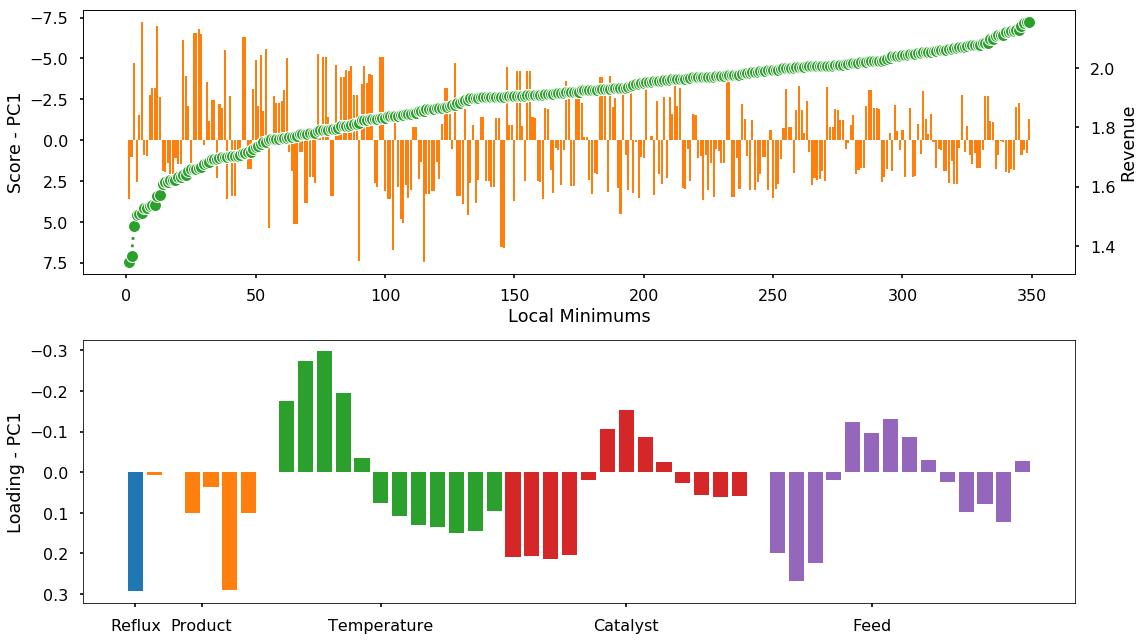

In [88]:
fig, axs = plt.subplots(2,1,figsize=(16,9))

'''
Scores
'''
x_loc = np.arange(1,len(scores[:,0])+1)
axs[0].bar(x_loc,scores[:,0],color = 'C1')

axs_ = axs[0].twinx()
axs_.plot(x_loc,profit_3_opt_results_unique[:,-1],'C2:o',markeredgecolor='w',markeredgewidth = 1,markersize=12)

# axs[1].legend()
axs[0].set_xlabel('Local Minimums')
axs[0].invert_yaxis()
axs[0].set_ylabel('Score - PC1')
axs_.set_ylabel('Revenue')

'''
Loading
'''
x_loc = np.arange(1,len(pca.components_[0])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs[1].bar(x_loc[grouping[key]],pca.components_[0][grouping[key]])
axs[1].set_xticks([1,4.5,14,27,40])
axs[1].set_xticklabels(list(grouping.keys()))

axs[1].set_ylabel('Loading - PC1')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()
plt.close()

In [89]:
pc1_pos = scores[:,0] >= 0
pc1_neg = scores[:,0] < 0

In [90]:
scores[:,1][pc1_pos][-1]

-2.717402059868367

In [91]:
# best positive case
profit_3_case_list[profit_3_obj_list.index(profit_3_opt_results_unique[pc1_pos][-1][-1])], profit_3_opt_results_unique[pc1_pos][-1][-1]

(76, 2.153)

In [92]:
# best negative case
profit_3_case_list[profit_3_obj_list.index(profit_3_opt_results_unique[pc1_neg][-1][-1])], profit_3_opt_results_unique[pc1_neg][-1][-1]

(317, 2.155)

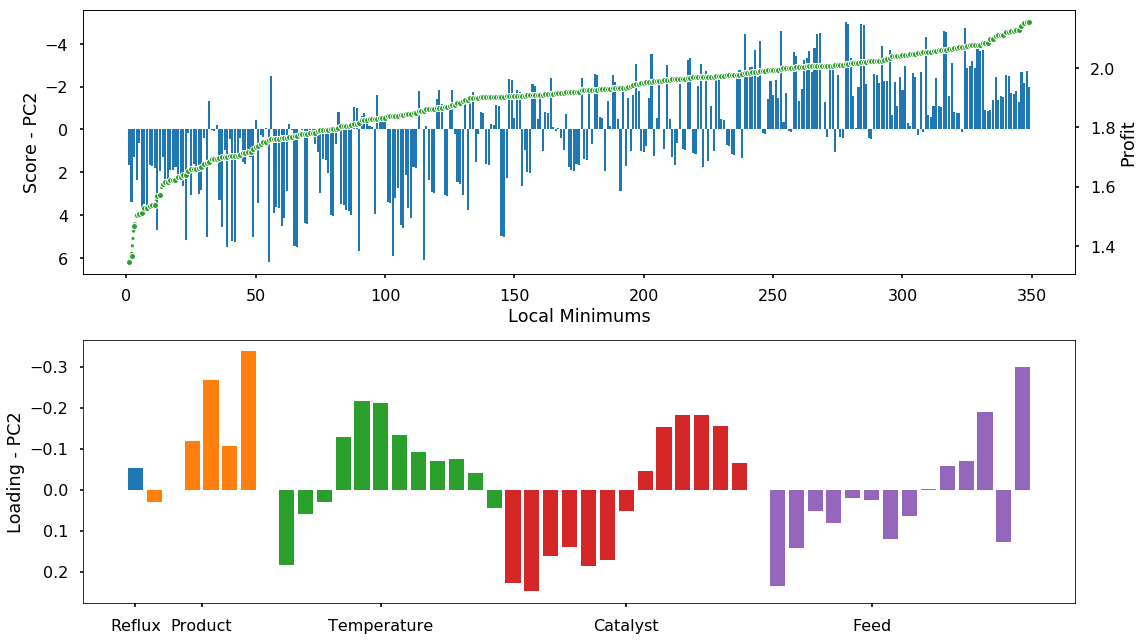

In [115]:
fig, axs = plt.subplots(2,1,figsize=(16,9))

'''
Scores
'''
x_loc = np.arange(1,len(scores[:,1])+1)
axs[0].bar(x_loc[pc1_pos],scores[:,1][pc1_pos],color = 'C0',label='PC1-Postitive')
axs[0].bar(x_loc[pc1_neg],scores[:,1][pc1_neg],color = 'C0',label='PC1-Negative')

axs_ = axs[0].twinx()
axs_.plot(x_loc,profit_3_opt_results_unique[:,-1],'C2:o',markeredgecolor='w',markeredgewidth = 1,markersize=6)

# axs[0].legend()

# axs[1].legend()
axs[0].set_xlabel('Local Minimums')
axs[0].invert_yaxis()
axs[0].set_ylabel('Score - PC2')
axs_.set_ylabel('Profit')

'''
Loading
'''
x_loc = np.arange(1,len(pca.components_[1])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs[1].bar(x_loc[grouping[key]],pca.components_[1][grouping[key]])
axs[1].set_xticks([1,4.5,14,27,40])
axs[1].set_xticklabels(list(grouping.keys()))

axs[1].set_ylabel('Loading - PC2')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()
plt.close()

### Predictions using pre-optimization data

In [94]:
profit_3_opt_origin_matrix.shape

(562, 49)

In [95]:
profit_3_opt_origin_scaled = scaling_object.transform(profit_3_opt_origin_matrix[:,:-1])

In [96]:
predicted_scores = pca.transform(profit_3_opt_origin_scaled)

cut-off:
* 100
* 200
* 300
* rest

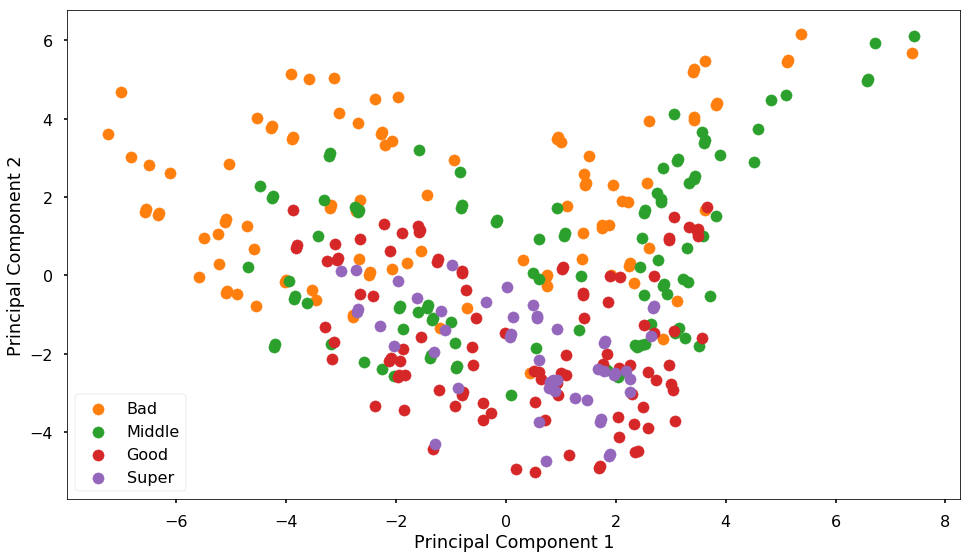

In [97]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
masks = {'Bad':[[0,21.54],slice(0,100),80],\
         'Middle':[[21.55,21.80],slice(100,200),10],\
         'Good':[[21.81,22.07],slice(200,300),10],\
         'Super':[[22.08,22.33],slice(300,None),80]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,0][mask[1]],scores[:,1][mask[1]],color=color,label=target)

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

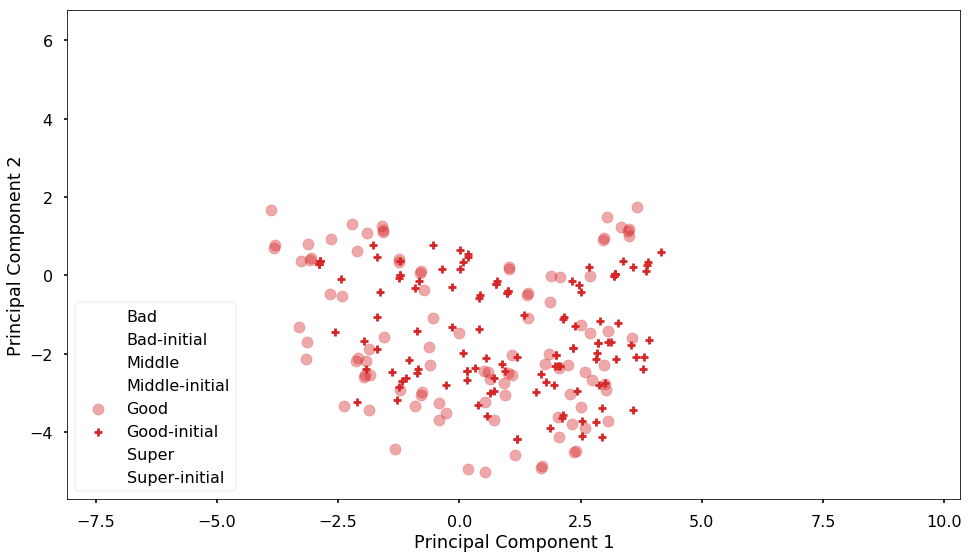

In [128]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
alpha_coefs = [0,0,1,0]
masks = {'Bad':[[0,profit_3_opt_results_unique[100][-1]],slice(0,100),50],\
         'Middle':[[profit_3_opt_results_unique[100][-1],profit_3_opt_results_unique[200][-1]],slice(100,200),50],\
         'Good':[[profit_3_opt_results_unique[200][-1],profit_3_opt_results_unique[300][-1]],slice(200,300),50],\
         'Super':[[profit_3_opt_results_unique[300][-1],profit_3_opt_results_unique[-1][-1]+0.1],slice(300,None),50]}

for target, color, alpha_coef in zip(targets,colors,alpha_coefs):
    mask = masks[target]
    axs.scatter(scores[:,0][mask[1]],scores[:,1][mask[1]],color=color,label=target,alpha=alpha_coef*0.4)
    tmp = [j for j,run in enumerate(profit_3_opt_origin_matrix) if run[-1] >= mask[0][0] and run[-1] < mask[0][1]]
    axs.scatter(predicted_scores[:,0][tmp],predicted_scores[:,1][tmp],marker='+',color=color,label=target+'-initial',alpha=alpha_coef*1,s=mask[-1])

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

# Average Temp Comparison: Sucess vs Failure

In [99]:
revenue_failure_case_ = [case for case in revenue_failure_case if case not in DDF_product_failure_case]

In [100]:
revenue_success_case_ = [total_runs[j_] for j_, j in enumerate(finished_revenue) if j]

In [101]:
initial_temp_revenue_failure = []

for j in revenue_failure_case_:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()
            
        for j, line in enumerate(reversed(log_content)):
            if '> Added DDF formulation - Product' in line:
                break
        initial_temp_revenue_failure.append(log_content[-j+15:-j+28])
            
initial_temp_revenue_failure = [[data.split() for data in case] for case in initial_temp_revenue_failure]
initial_temp_revenue_failure = np.array([[float(obv[1]) for obv in case] for case in initial_temp_revenue_failure])

In [102]:
initial_temp_revenue_success = []

for j in revenue_success_case_:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()
            
        for j, line in enumerate(reversed(log_content)):
            if '> Added DDF formulation - Product' in line:
                break
        initial_temp_revenue_success.append(log_content[-j+15:-j+28])
            
initial_temp_revenue_success = [[data.split() for data in case] for case in initial_temp_revenue_success]
initial_temp_revenue_success = np.array([[float(obv[1]) for obv in case] for case in initial_temp_revenue_success])

In [103]:
ave_temp_revenue_failure = np.mean(initial_temp_revenue_failure, axis=0)

In [104]:
ave_temp_revenue_success = np.mean(initial_temp_revenue_success, axis=0)

In [105]:
ave_temp_revenue_failure

array([223.51234177, 226.1585443 , 230.31107595, 232.5193038 ,
       236.61044304, 239.38892405, 242.97721519, 245.49050633,
       247.6471519 , 250.85316456, 256.90759494, 261.45791139,
       272.20886076])

In [106]:
ave_temp_revenue_success

array([223.53865248, 226.83280142, 230.40106383, 233.85159574,
       236.16648936, 240.21382979, 243.08173759, 246.23705674,
       249.67358156, 253.91968085, 258.55567376, 265.0501773 ,
       271.64609929])

In [107]:
list(zip())

[]

# Restoration Fail

In [108]:
restoration_fail_case

[74,
 124,
 168,
 233,
 263,
 419,
 453,
 459,
 552,
 778,
 782,
 603,
 712,
 34,
 47,
 63,
 133,
 222,
 251,
 334,
 383,
 643,
 832,
 858,
 915,
 944,
 988,
 1]

In [109]:
restoration_phase = []

for j_ in restoration_fail_case:
    file_name = 'Preset_Case_{}_pf.output'.format(j_)
    with open('./tmp/'+file_name) as f:
        log_content = f.readlines()
            
        for j, line in enumerate(reversed(log_content)):
            if line.startswith('Number of Iterations....'):
                break
        if j < 50:
            restoration_phase.append(log_content[-j+2:-j+4])
            
restoration_phase = [[data.split() for data in case] for case in restoration_phase]
restoration_phase_obj = np.array([[float(obv[1]) for obv in case[0:1]] for case in restoration_phase])
restoration_phase_inf = np.array([[float(obv[2]) for obv in case[1:2]] for case in restoration_phase])

In [110]:
tmp_list = [finished_revenue,
            finished_DDF_reflux,
            finished_profit_3,
            finished_profit_3_1,
            finished_profit_3_2]

In [111]:
for n, (i,j) in enumerate(zip(restoration_phase_obj, restoration_phase_inf)):
    for l in tmp_list:
        loc = total_runs.index(restoration_fail_case[n])
        print(l[loc],end='\t')
    print('{:2.2f}\t\t{:.2e}'.format(i[0],j[0]))

False	False	False	False	False	-17.27		9.90e+12
False	False	False	False	False	-24.26		1.72e+16
False	False	False	False	False	-0.01		1.33e+17
False	False	False	False	False	-10.69		1.00e+02
False	False	False	False	False	4.51		8.97e+16
False	False	False	False	False	3.58		1.01e+02
False	False	False	False	False	-16.54		5.33e+07
False	False	False	False	False	8.03		2.49e+16
False	False	False	False	False	-4.63		4.86e-09
False	False	False	False	False	-4.84		4.18e-09
False	False	False	False	False	-4.82		1.69e-09
True	True	False	True	True	-4.72		1.84e-09
True	True	False	True	True	-4.90		4.38e-09
True	True	True	False	True	-4.77		1.73e-09
True	True	True	False	True	-4.65		3.62e-09
True	True	True	False	True	-4.71		8.98e-13
True	True	True	False	True	-4.88		3.07e-10
True	True	True	False	True	-4.48		1.84e-12
True	True	True	False	True	-4.86		4.49e-09
True	True	True	False	True	-4.82		1.69e-09
True	True	True	False	True	-4.73		2.96e-09
True	True	True	False	True	-4.64		3.86e-09
True	True	True	False	True	-4.72